In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
# %matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_digits
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn import preprocessing
from datetime import datetime
from datetime import timedelta
import statistics as s
import scipy as stats
import statsmodels.api as sm
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, transforms
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.datasets import mnist
import yfinance as yf
from datetime import date
import matplotlib.dates as mdates
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.neighbors import LocalOutlierFactor
import schedule
import time

In [190]:
pocket_move_df = pd.read_csv('pocket_sorted_time.csv') #'spiral_date_test1.txt', delimiter='\t')
spiral_move_df = pd.read_csv('spiral_sorted_time_2.csv') #'spiral_date_test1.txt', delimiter='\t')

In [191]:
gcode_movement_values = pd.read_csv("gcode_movement_num.csv", delimiter=',')
spiral_gcode_values = pd.read_csv("spiral_gcode_movement_num.csv", delimiter=',') # fix set
cube_gcode_values = pd.read_csv("cube_gcode_movement_num.csv", delimiter=',')
# spiral_movement = pd.read_csv('spiral_sorted_time_2.csv')

In [192]:
spiral_gcode_values

b      b.1             x             y            z
0           0        0   ['X0.0193']  ['Y-0.0158']  ['Z1.6729']
1           0        0  ['X-0.0193']   ['Y0.0158']  ['Z1.6443']
2           0        0   ['X0.0193']  ['Y-0.0158']  ['Z1.6157']
3           0        0    ['X0.025']       ['Y0.']  ['Z1.6095']
4           0        0   ['X-0.025']             0            0
...       ...      ...           ...           ...          ...
5732        0        0             0             0      ['Z0.']
5733        0        0      ['X2.5']      ['Y2.5']            0
5734        0        0             0             0            0
5735  ['A0.']  ['B0.']             0             0            0
5736        0        0             0             0            0

[5737 rows x 5 columns]

In [193]:
# spiral_movement

In [194]:
gcode_movement_values

a         b       x       y       z
0     0     0.000  2.5000  2.5000  0.0000
1     0     0.000  0.0000  0.0000  0.0000
2     0     0.000  0.0000  0.0000  0.0000
3     0     0.000  0.0000  0.0000  0.0000
4     0     0.000  0.0000  0.0000  0.0000
...  ..       ...     ...     ...     ...
8044  0  8989.761  0.1443 -0.6713  0.3601
8045  0  8986.302  0.1658 -0.6725  0.3507
8046  0  8982.701  0.1875 -0.6738  0.3396
8047  0  8979.102  0.2084 -0.6750  0.3272
8048  0  8975.496  0.2286 -0.6763  0.3134

[8049 rows x 5 columns]

In [195]:
# plt.figure(figsize=(12, 12))
# plt.scatter(spiral_gcode_values['x'], spiral_gcode_values['y'], marker='.', s=5)
# plt.scatter(spiral_move_df['xpm'], spiral_move_df['ypm'], marker='.', s=5)
# plt.xlabel('x axis')
# plt.ylabel('y axis')
# plt.show()

In [196]:
cube_movement = pd.read_csv("data 3.csv", delimiter=',')

In [197]:
cube_move_graph_xyz = cube_movement.drop(columns=['a', 'b'])

<Axes: >

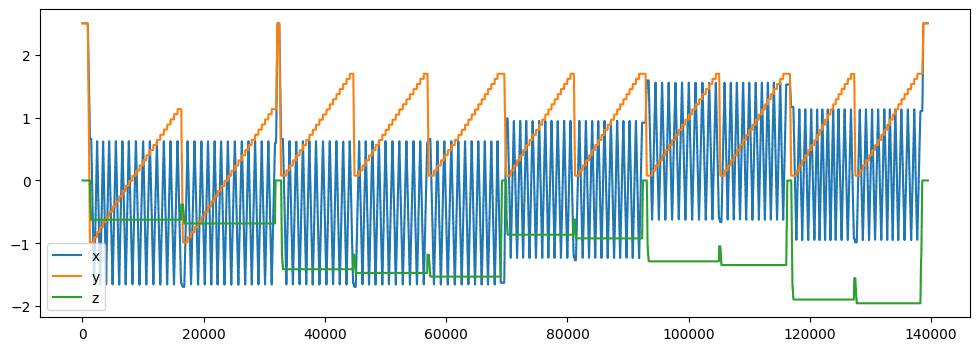

In [198]:
cube_move_graph_xyz.plot(figsize=(12, 4))

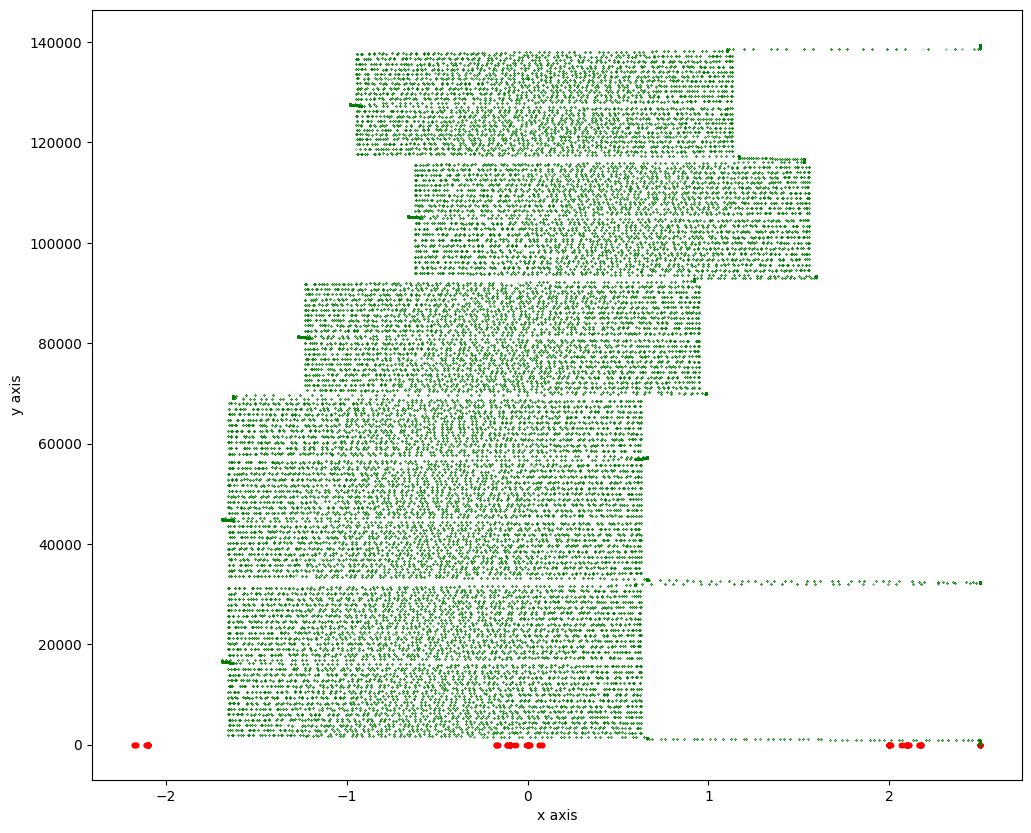

In [199]:
plt.figure(figsize=(12, 10))

plt.scatter(cube_gcode_values['x'], cube_gcode_values['y'], marker='o', s=10, c='r')
plt.scatter(cube_move_graph_xyz['x'], cube_move_graph_xyz.index, marker='.', s=0.1, c='g')

plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()

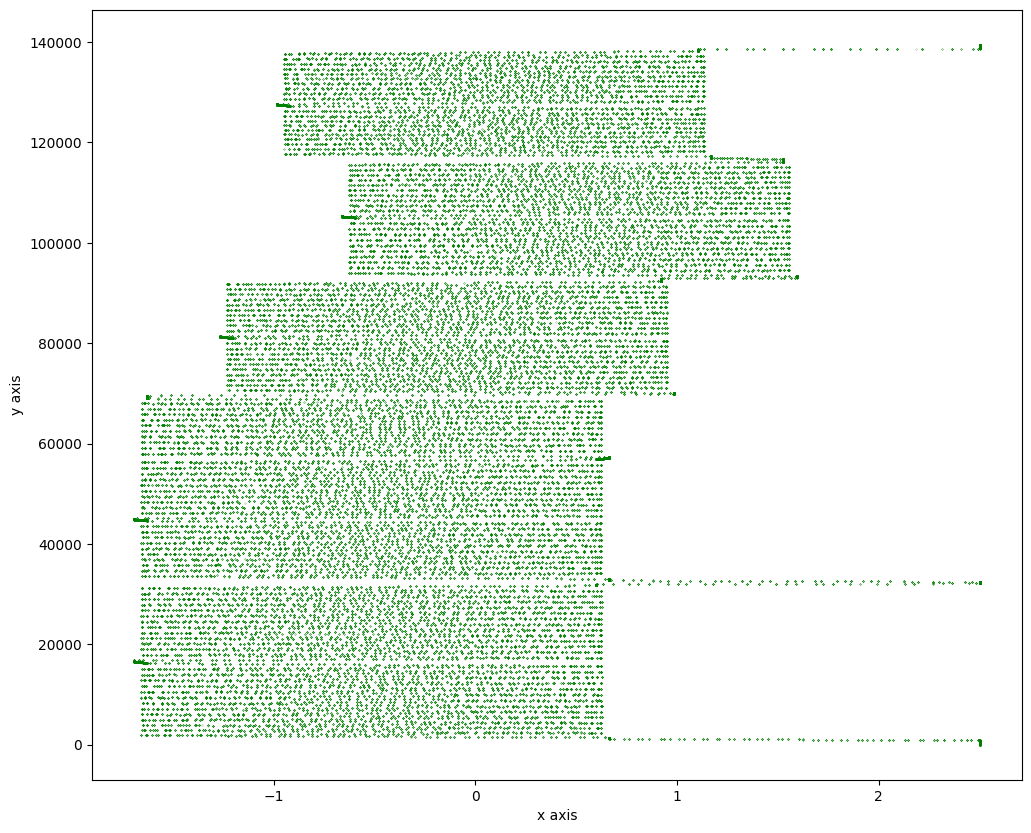

In [200]:
plt.figure(figsize=(12, 10))

plt.scatter(cube_move_graph_xyz['x'], cube_move_graph_xyz.index, marker='.', s=0.1, c='g')

plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()

In [201]:
cube_move_good = cube_movement.copy()
cube_move_good2 = cube_movement.copy()
cube_move_bad = cube_movement.copy()
cube_move_bad2 = cube_movement.copy()

testing on movement data

In [202]:
cube_move_good.loc[cube_move_good['x'] != 0, 'x'] = cube_move_good.loc[cube_move_good['x'] != 0, 'x'] + 0.02
cube_move_good.loc[cube_move_good['y'] != 0, 'y'] = cube_move_good.loc[cube_move_good['y'] != 0, 'y'] + 0.01
cube_move_good.loc[cube_move_good['z'] != 0, 'z'] = cube_move_good.loc[cube_move_good['z'] != 0, 'z'] - 0.005


cube_move_good2.loc[cube_move_good2['x'] != 0, 'x'] = cube_move_good2.loc[cube_move_good2['x'] != 0, 'x'] - 0.02
cube_move_good2.loc[cube_move_good2['y'] != 0, 'y'] = cube_move_good2.loc[cube_move_good2['y'] != 0, 'y'] - 0.01
cube_move_good2.loc[cube_move_good2['z'] != 0, 'z'] = cube_move_good2.loc[cube_move_good2['z'] != 0, 'z'] + 0.005


# cube_move_good3.loc[cube_move_good3['x'] != 0, 'x'] = cube_move_good3.loc[cube_move_good3['x'] != 0, 'x'] - 0.05
# cube_move_good3.loc[cube_move_good3['y'] != 0, 'y'] = cube_move_good3.loc[cube_move_good3['y'] != 0, 'y'] - 0.05
# cube_move_good3.loc[cube_move_good3['z'] != 0, 'z'] = cube_move_good3.loc[cube_move_good3['z'] != 0, 'z'] - 0.05


cube_move_bad.loc[cube_move_bad['x'] != 0, 'x'] = cube_move_bad.loc[cube_move_bad['x'] != 0, 'x'] + 0.06
cube_move_bad.loc[cube_move_bad['y'] != 0, 'y'] = cube_move_bad.loc[cube_move_bad['y'] != 0, 'y'] - 0.07
cube_move_bad.loc[cube_move_bad['z'] != 0, 'z'] = cube_move_bad.loc[cube_move_bad['z'] != 0, 'z'] + 0.01


cube_move_bad2.loc[cube_move_bad2['x'] != 0, 'x'] = cube_move_bad2.loc[cube_move_bad2['x'] != 0, 'x'] - 0.06
cube_move_bad2.loc[cube_move_bad2['y'] != 0, 'y'] = cube_move_bad2.loc[cube_move_bad2['y'] != 0, 'y'] + 0.07
cube_move_bad2.loc[cube_move_bad2['z'] != 0, 'z'] = cube_move_bad2.loc[cube_move_bad2['z'] != 0, 'z'] - 0.01

In [203]:
# cube_gcode_bad_y['y'].iloc[:300] = cube_gcode_bad_y['y'].iloc[:300] + 0.15
# cube_gcode_bad_y['x'].iloc[:300] = cube_gcode_bad_y['x'].iloc[:300] + 0.25
# cube_gcode_bad_y['z'].iloc[:150] = cube_gcode_bad_y['z'].iloc[:150] + 0.25
# # cube_gcode_bad_y['y'] = cube_gcode_bad_y['y'].iloc[:120] + 0.75

In [204]:
cube_move_good2

a        b     x     y    z
0      -0.0  -0.0000  2.48  2.49  0.0
1      -0.0  -0.0000  2.48  2.49  0.0
2      -0.0  -0.0000  2.48  2.49  0.0
3      -0.0  -0.0000  2.48  2.49  0.0
4      -0.0  -0.0000  2.48  2.49  0.0
...     ...      ...   ...   ...  ...
139453  0.0  20.1381  2.48  2.49 -0.0
139454  0.0  20.1381  2.48  2.49 -0.0
139455  0.0  18.3001  2.48  2.49 -0.0
139456  0.0  18.3001  2.48  2.49 -0.0
139457  0.0  18.3001  2.48  2.49 -0.0

[139458 rows x 5 columns]

In [205]:
cube_move_good['target'] = 1
cube_move_good2['target'] = 1

cube_move_bad['target'] = 0
cube_move_bad2['target'] = 0

In [206]:
cube_move_concat_df = pd.concat([cube_move_good, cube_move_good2, cube_move_bad, cube_move_bad2], axis=0)

cube_move_x_df = pd.concat([cube_move_good['x'], cube_move_good2['x'], cube_move_bad['x'], cube_move_bad2['x']], axis=0)
cube_move_y_df = pd.concat([cube_move_good['y'], cube_move_good2['y'], cube_move_bad['y'], cube_move_bad2['y']], axis=0)
cube_move_z_df = pd.concat([cube_move_good['z'], cube_move_good2['z'], cube_move_bad['z'], cube_move_bad2['z']], axis=0)

cube_move_x_df = pd.concat([cube_move_x_df, cube_move_concat_df['target']], axis=1)
cube_move_y_df = pd.concat([cube_move_y_df, cube_move_concat_df['target']], axis=1)
cube_move_z_df = pd.concat([cube_move_z_df, cube_move_concat_df['target']], axis=1)

In [207]:
cube_move_x_df

x  target
0       2.52       1
1       2.52       1
2       2.52       1
3       2.52       1
4       2.52       1
...      ...     ...
139453  2.44       0
139454  2.44       0
139455  2.44       0
139456  2.44       0
139457  2.44       0

[557832 rows x 2 columns]

In [208]:
cube_move_concat_df

a        b     x     y    z  target
0      -0.0  -0.0000  2.52  2.51  0.0       1
1      -0.0  -0.0000  2.52  2.51  0.0       1
2      -0.0  -0.0000  2.52  2.51  0.0       1
3      -0.0  -0.0000  2.52  2.51  0.0       1
4      -0.0  -0.0000  2.52  2.51  0.0       1
...     ...      ...   ...   ...  ...     ...
139453  0.0  20.1381  2.44  2.57 -0.0       0
139454  0.0  20.1381  2.44  2.57 -0.0       0
139455  0.0  18.3001  2.44  2.57 -0.0       0
139456  0.0  18.3001  2.44  2.57 -0.0       0
139457  0.0  18.3001  2.44  2.57 -0.0       0

[557832 rows x 6 columns]

In [209]:
# cube_gcode_concat_df = cube_gcode_concat_df.fillna(0)
# cube_gcode_concat_df

In [210]:
Xx = cube_move_x_df.drop(columns=['target'])
yx = pd.DataFrame(cube_move_x_df['target'])

# pca = PCA(n_components = 2)
# fps_X = pca.fit_transform(X)

X_trainx, X_testx, y_trainx, y_testx = train_test_split(Xx, yx, test_size=0.3, random_state=42, shuffle=True)


# scaler = RobustScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# y_train

knnx = KNeighborsClassifier(n_neighbors=5)
knnx.fit(X_trainx, y_trainx)

y_predx = knnx.predict(X_testx)

accuracyx = accuracy_score(y_testx, y_predx)
print("Length: ", len(X_testx))
print("Accuracy:", accuracyx)
class_reportx = classification_report(y_testx, y_predx)
print("Classification Report:\n", class_reportx)

# print("Percent 0 predicted: ", (((y_predx == 0).sum()/len(X_testx * 100))))

c:\Users\jas45\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Length:  167350
Accuracy: 0.8156139826710487
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.82     83667
           1       0.82      0.81      0.82     83683

    accuracy                           0.82    167350
   macro avg       0.82      0.82      0.82    167350
weighted avg       0.82      0.82      0.82    167350



In [211]:
Xy = cube_move_y_df.drop(columns=['target'])
yy = pd.DataFrame(cube_move_y_df['target'])

X_trainy, X_testy, y_trainy, y_testy = train_test_split(Xy, yy, test_size=0.3, random_state=42, shuffle=True)

knny = KNeighborsClassifier(n_neighbors=5)
knny.fit(X_trainy, y_trainy)

y_predy = knny.predict(X_testy)

accuracyy = accuracy_score(y_testy, y_predy)
print("Length: ", len(X_testy))
print("Accuracy:", accuracyy)
class_reporty = classification_report(y_testy, y_predy)
print("Classification Report:\n", class_reporty)

# print("Percent predicted: ", (((y_predy == 0).sum()/len(X_testy * 100))))

c:\Users\jas45\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Length:  167350
Accuracy: 0.9960023902001792
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     83667
           1       1.00      1.00      1.00     83683

    accuracy                           1.00    167350
   macro avg       1.00      1.00      1.00    167350
weighted avg       1.00      1.00      1.00    167350



In [212]:
Xz = cube_move_z_df.drop(columns=['target'])
yz = pd.DataFrame(cube_move_z_df['target'])

X_trainz, X_testz, y_trainz, y_testz = train_test_split(Xz, yz, test_size=0.3, random_state=42, shuffle=True)

knnz = KNeighborsClassifier(n_neighbors=5)
knnz.fit(X_trainz, y_trainz)

y_predz = knnz.predict(X_testz)

accuracyz = accuracy_score(y_testz, y_predz)
print("Length: ", len(X_testz))
print("Accuracy:", accuracyz)
class_reportz = classification_report(y_testz, y_predz)
print("Classification Report:\n", class_reportz)

# print("Percent 0 predicted: ", (((y_predz == 0).sum()/len(X_testz * 100))))

c:\Users\jas45\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Length:  167350
Accuracy: 0.9807887660591574
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     83667
           1       0.96      1.00      0.98     83683

    accuracy                           0.98    167350
   macro avg       0.98      0.98      0.98    167350
weighted avg       0.98      0.98      0.98    167350



use neural network to make prediction from knn

In [213]:
# y_pred = knn.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# print("Length: ", len(X_test))
# print("Accuracy:", accuracy)
# class_report = classification_report(y_test, y_pred)
# print("Classification Report:\n", class_report)

# print("Prediction accuracy: ", (((y_pred == 0).sum()/len(X_test * 100))))

a test like this will eventually be passed to one model, not split up

In [214]:
cube_move_bad_test = cube_movement.copy()

cube_move_bad_test.loc[cube_move_bad_test['x'] != 0, 'x'] = cube_move_bad_test.loc[cube_move_bad_test['x'] != 0, 'x'] + 0.05 # predicts 85% the values from training
cube_move_bad_test.loc[cube_move_bad_test['y'] != 0, 'y'] = cube_move_bad_test.loc[cube_move_bad_test['y'] != 0, 'y'] + 0.06
cube_move_bad_test.loc[cube_move_bad_test['z'] != 0, 'z'] = cube_move_bad_test.loc[cube_move_bad_test['z'] != 0, 'z'] + 0.01

In [215]:
cube_move_bad_test['target'] = 0

In [216]:
cube_move_bad_test

a        b     x     y    z  target
0      -0.0  -0.0000  2.55  2.56  0.0       0
1      -0.0  -0.0000  2.55  2.56  0.0       0
2      -0.0  -0.0000  2.55  2.56  0.0       0
3      -0.0  -0.0000  2.55  2.56  0.0       0
4      -0.0  -0.0000  2.55  2.56  0.0       0
...     ...      ...   ...   ...  ...     ...
139453  0.0  20.1381  2.55  2.56 -0.0       0
139454  0.0  20.1381  2.55  2.56 -0.0       0
139455  0.0  18.3001  2.55  2.56 -0.0       0
139456  0.0  18.3001  2.55  2.56 -0.0       0
139457  0.0  18.3001  2.55  2.56 -0.0       0

[139458 rows x 6 columns]

In [217]:
X_newx = cube_move_bad_test.drop(columns=['target', 'a', 'b', 'y', 'z'])
y_newx = pd.DataFrame(cube_move_bad_test['target'])

X_newy = cube_move_bad_test.drop(columns=['target', 'a', 'b', 'x', 'z'])
y_newy = pd.DataFrame(cube_move_bad_test['target'])

X_newz = cube_move_bad_test.drop(columns=['target', 'a', 'b', 'x', 'y'])
y_newz = pd.DataFrame(cube_move_bad_test['target'])

X_trainnewx, X_testnewx, y_trainnewx, y_testnewx = train_test_split(X_newx, y_newx, test_size=0.99, random_state=42, shuffle=True)
X_trainnewy, X_testnewy, y_trainnewy, y_testnewy = train_test_split(X_newy, y_newy, test_size=0.99, random_state=42, shuffle=True)
X_trainnewz, X_testnewz, y_trainnewz, y_testnewz = train_test_split(X_newz, y_newz, test_size=0.99, random_state=42, shuffle=True)

# scaler = RobustScaler()
# X_train = scaler.fit_transform(X_trainx)
# X_testnew = scaler.transform(X_test)
# y_train

y_prednewx = knnx.predict(X_testnewx)
y_prednewy = knny.predict(X_testnewy)
y_prednewz = knnz.predict(X_testnewz)

# accuracy = accuracy_score(y_test, y_prednew)
# print("Length: ", len(X_testnew))
# print("Accuracy:", accuracy)
# class_report = classification_report(y_test, y_prednew)
# print("Classification Report:\n", class_report)

print("Percent predicted: ", (((y_prednewx == 0).sum()/len(X_testnewx) * 100)))
print("Percent predicted: ", (((y_prednewy == 0).sum()/len(X_testnewy) * 100)))
print("Percent predicted: ", (((y_prednewz == 0).sum()/len(X_testnewz) * 100)))

Percent predicted:  51.39355661142658
Percent predicted:  46.23000927106269
Percent predicted:  96.33213582106849


In [218]:
# accuracynewx = accuracy_score(y_testnewx, y_prednewx)
# print("Length: ", len(X_testnewx))
# print("Accuracy:", accuracynewx)
# class_reportnewx = classification_report(y_testnewx, y_prednewx)
# print("Classification Report:\n", class_reportnewx)

In [219]:
# accuracynewy = accuracy_score(y_testnewy, y_prednewy)
# print("Length: ", len(X_testnewy))
# print("Accuracy:", accuracynewx)
# class_reportnewy = classification_report(y_testnewy, y_prednewy)
# print("Classification Report:\n", class_reportnewy)

In [220]:
# accuracynewz = accuracy_score(y_testnewz, y_prednewz)
# print("Length: ", len(X_testnewz))
# print("Accuracy:", accuracynewz)
# class_reportnewz = classification_report(y_testnewz, y_prednewz)
# print("Classification Report:\n", class_reportnewz)

nn

In [221]:
# clf = MLPClassifier(solver='sgd', alpha=1e-5, batch_size=100,
#                     hidden_layer_sizes=(20, 10), learning_rate_init=0.0001, max_iter=10000000, random_state=42, tol=0.00001) # 3 layers of 5, 5, and 2 units (neurons) 

# clf.fit(X_train, y_train)

# X_test = pd.DataFrame(X_test)
# y_pred_nn = clf.predict(X_test)

# proba = clf.predict_proba(X_test[:1])

# #y_pred = knn.predict(X_test) 
# accuracy = accuracy_score(y_test, y_pred_nn) 

# print("Accuracy:", accuracy)

# dotscore = clf.score(X_test, y_test)
# print("The score: ", dotscore)

# print("The proba: ", proba)

# class_report = classification_report(y_test, y_pred_nn)
# print("Classification Report:\n", class_report)

from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

clf = SVC(C=100,gamma=0.0001)
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
clf.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train, clf=clf, legend=2)

plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)

Real movement data

In [222]:
data_good_1_orig = pd.read_csv("data_good_1 - Copy.csv", delimiter=',')
data_good_2_orig = pd.read_csv("data_good_2 - Copy.csv", delimiter=',')
data_good_3_orig = pd.read_csv("data_good_3 - Copy.csv", delimiter=',')
data_good_4_orig = pd.read_csv("data_good_4 - Copy.csv", delimiter=',')

bad_data_1_orig = pd.read_csv("bad_data - Copy.csv", delimiter=',')


In [223]:
data_good_1_orig = data_good_1_orig.dropna()
data_good_2_orig = data_good_2_orig.dropna()
data_good_3_orig = data_good_3_orig.dropna()
data_good_4_orig = data_good_4_orig.dropna()

bad_data_1_orig = bad_data_1_orig.dropna()

In [224]:
data_good_1_orig.describe()

a              b              x              y  \
count  138988.000000  138988.000000  138988.000000  138988.000000   
mean       20.512054      89.889076      -0.131994       0.728383   
std        37.680527     103.063358       0.840261       0.664997   
min         0.000000       0.000000      -1.692400      -0.984500   
25%         0.000000       0.000000      -0.765600       0.238700   
50%         0.000000      90.000000      -0.143700       0.724800   
75%         0.000000     180.000000       0.462100       1.210900   
max        90.000000     270.000000       2.500000       2.500000   

                   z  
count  138988.000000  
mean       -1.179461  
std         0.485110  
min        -1.952900  
25%        -1.470400  
50%        -1.286000  
75%        -0.683400  
max         0.000000

In [225]:
# data_good_1_orig.mean(axis=1)
data_good_1_orig

a        b    x    y    z
470     0.126   0.0000  2.5  2.5  0.0
471     0.126   0.0000  2.5  2.5  0.0
472     0.126   0.0000  2.5  2.5  0.0
473     0.126   0.0000  2.5  2.5  0.0
474     0.126   0.0000  2.5  2.5  0.0
...       ...      ...  ...  ...  ...
139453  0.000  20.1381  2.5  2.5  0.0
139454  0.000  20.1381  2.5  2.5  0.0
139455  0.000  18.3001  2.5  2.5  0.0
139456  0.000  18.3001  2.5  2.5  0.0
139457  0.000  18.3001  2.5  2.5  0.0

[138988 rows x 5 columns]

In [226]:
data_good_2_orig

a    b    x    y    z
1071    0.000  0.0  2.5  2.5  0.0
1072    0.195  0.0  2.5  2.5  0.0
1073    0.195  0.0  2.5  2.5  0.0
1074    0.195  0.0  2.5  2.5  0.0
1075    0.195  0.0  2.5  2.5  0.0
...       ...  ...  ...  ...  ...
129688  0.000  0.0  2.5  2.5  0.0
129689  0.000  0.0  2.5  2.5  0.0
129690  0.000  0.0  2.5  2.5  0.0
129691  0.000  0.0  2.5  2.5  0.0
129692  0.000  0.0  2.5  2.5  0.0

[128622 rows x 5 columns]

In [227]:
data_good_2_orig.describe()

a              b              x              y  \
count  128622.000000  128622.000000  128622.000000  128622.000000   
mean       19.492116      91.004751      -0.121828       0.744123   
std        36.996931     103.542322       0.850423       0.669465   
min         0.000000       0.000000      -1.692400      -0.984500   
25%         0.000000       0.000000      -0.757300       0.319700   
50%         0.000000      90.000000      -0.142000       0.744100   
75%         0.000000     180.000000       0.465700       1.210900   
max        90.000000     270.000000       2.500000       2.500000   

                   z  
count  128622.000000  
mean       -1.183827  
std         0.490562  
min        -1.952900  
25%        -1.470400  
50%        -1.286000  
75%        -0.683400  
max         0.000000

In [228]:
data_good_3_orig.describe()

a              b              x             y  \
count  129752.000000  129752.000000  129752.000000  129752.00000   
mean       20.521224      90.292709      -0.131561       0.72812   
std        37.685068     103.288685       0.841861       0.66728   
min         0.000000       0.000000      -1.692400      -0.98450   
25%         0.000000       0.000000      -0.761900       0.23870   
50%         0.000000      90.000000      -0.145600       0.72480   
75%         0.000000     180.000000       0.462000       1.21090   
max        90.000000     270.000000       2.500000       2.50000   

                   z  
count  129752.000000  
mean       -1.179853  
std         0.487126  
min        -1.952900  
25%        -1.470400  
50%        -1.286000  
75%        -0.683400  
max         0.000000

In [229]:
data_good_4_orig.describe()

a              b              x             y  \
count  128000.000000  128000.000000  128000.000000  128000.00000   
mean       20.358940      90.859793      -0.116254       0.73606   
std        37.579404     103.464889       0.857728       0.67836   
min         0.000000       0.000000      -1.692400      -0.98450   
25%         0.000000       0.000000      -0.754300       0.25180   
50%         0.000000      90.000000      -0.134500       0.72760   
75%         0.000000     180.000000       0.472500       1.21090   
max        90.000000     270.000000       2.500000       2.50000   

                   z  
count  128000.000000  
mean       -1.175001  
std         0.493004  
min        -1.952900  
25%        -1.470400  
50%        -1.286000  
75%        -0.683400  
max         0.000000

In [230]:
bad_data_1_orig.describe()

a              b              x              y  \
count  126452.000000  126452.000000  126452.000000  126452.000000   
mean       20.332008      90.337568      -0.137196       0.725281   
std        37.564208     103.131867       0.840365       0.667565   
min         0.000000       0.000000      -1.692400      -0.984500   
25%         0.000000       0.000000      -0.768800       0.238700   
50%         0.000000      90.000000      -0.153300       0.724800   
75%         0.000000     180.000000       0.452500       1.210900   
max        90.000000     270.000000       2.500000       2.500000   

                   z  
count  126452.000000  
mean       -1.179942  
std         0.486876  
min        -1.942900  
25%        -1.480400  
50%        -1.296000  
75%        -0.683400  
max         0.000000

In [231]:
good_1 = pd.DataFrame(data_good_1_orig.describe())
good_2 = pd.DataFrame(data_good_2_orig.describe())
good_3 = pd.DataFrame(data_good_3_orig.describe())
good_4 = pd.DataFrame(data_good_4_orig.describe())

bad_1 =  pd.DataFrame(bad_data_1_orig.describe())


In [232]:
# good_1.compare(good_2, keep_shape=True, keep_equal=True)

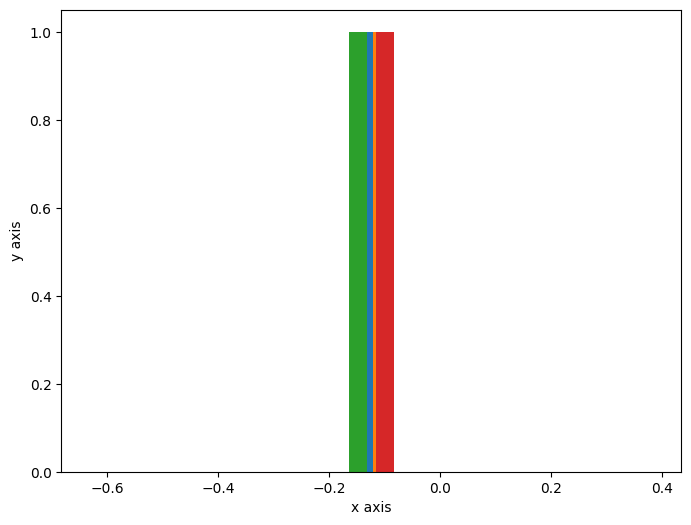

In [233]:
plt.figure(figsize=(8, 6))
plt.hist(data_good_1_orig['x'].mean(), bins=30, stacked=True)
plt.hist(data_good_2_orig['x'].mean(), bins=30, stacked=True)
plt.hist(data_good_3_orig['x'].mean(), bins=30, stacked=True)
plt.hist(data_good_4_orig['x'].mean(), bins=30, stacked=True)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()

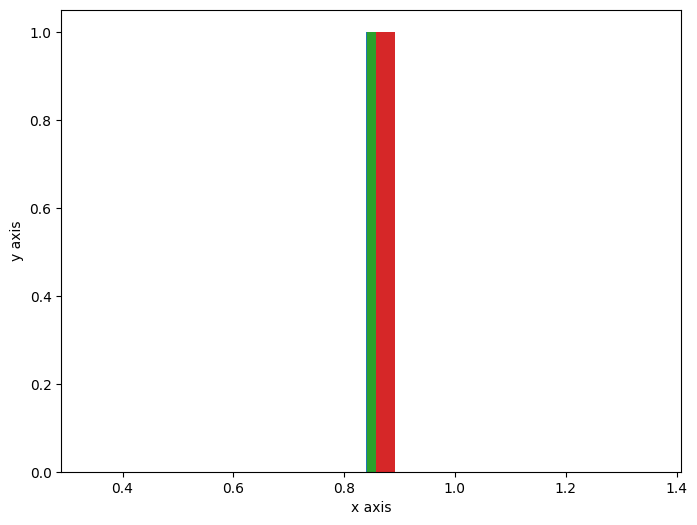

In [234]:
plt.figure(figsize=(8, 6))
plt.hist(data_good_1_orig['x'].std(), bins=30, stacked=True)
plt.hist(data_good_2_orig['x'].std(), bins=30, stacked=True)
plt.hist(data_good_3_orig['x'].std(), bins=30, stacked=True)
plt.hist(data_good_4_orig['x'].std(), bins=30, stacked=True)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()

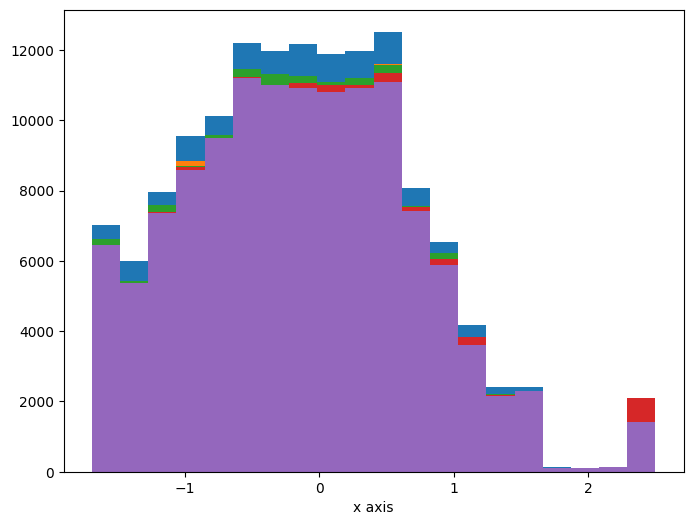

In [235]:
plt.figure(figsize=(8, 6))
plt.hist(data_good_1_orig['x'], bins=20, stacked=True)
plt.hist(data_good_2_orig['x'], bins=20, stacked=True)
plt.hist(data_good_3_orig['x'], bins=20, stacked=True)
plt.hist(data_good_4_orig['x'], bins=20, stacked=True)

plt.hist(bad_data_1_orig['x'], bins=20, stacked=True)

plt.xlabel('x axis')
# plt.ylabel('y axis')
plt.show()

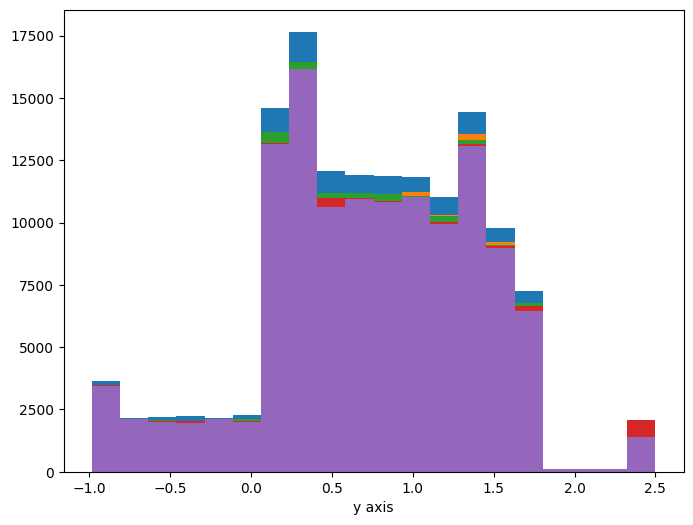

In [236]:
plt.figure(figsize=(8, 6))
plt.hist(data_good_1_orig['y'], bins=20, stacked=True)
plt.hist(data_good_2_orig['y'], bins=20, stacked=True)
plt.hist(data_good_3_orig['y'], bins=20, stacked=True)
plt.hist(data_good_4_orig['y'], bins=20, stacked=True)
plt.hist(bad_data_1_orig['y'], bins=20, stacked=True)

plt.xlabel('y axis')
# plt.ylabel('y axis')
plt.show()

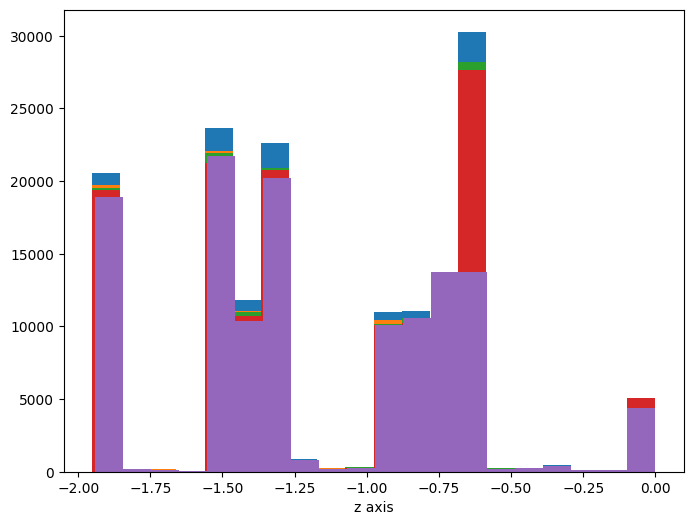

In [237]:
plt.figure(figsize=(8, 6))
plt.hist(data_good_1_orig['z'], bins=20, stacked=True)
plt.hist(data_good_2_orig['z'], bins=20, stacked=True)
plt.hist(data_good_3_orig['z'], bins=20, stacked=True)
plt.hist(data_good_4_orig['z'], bins=20, stacked=True)
plt.hist(bad_data_1_orig['z'], bins=20, stacked=True)

plt.xlabel('z axis')
# plt.ylabel('y axis')
plt.show()

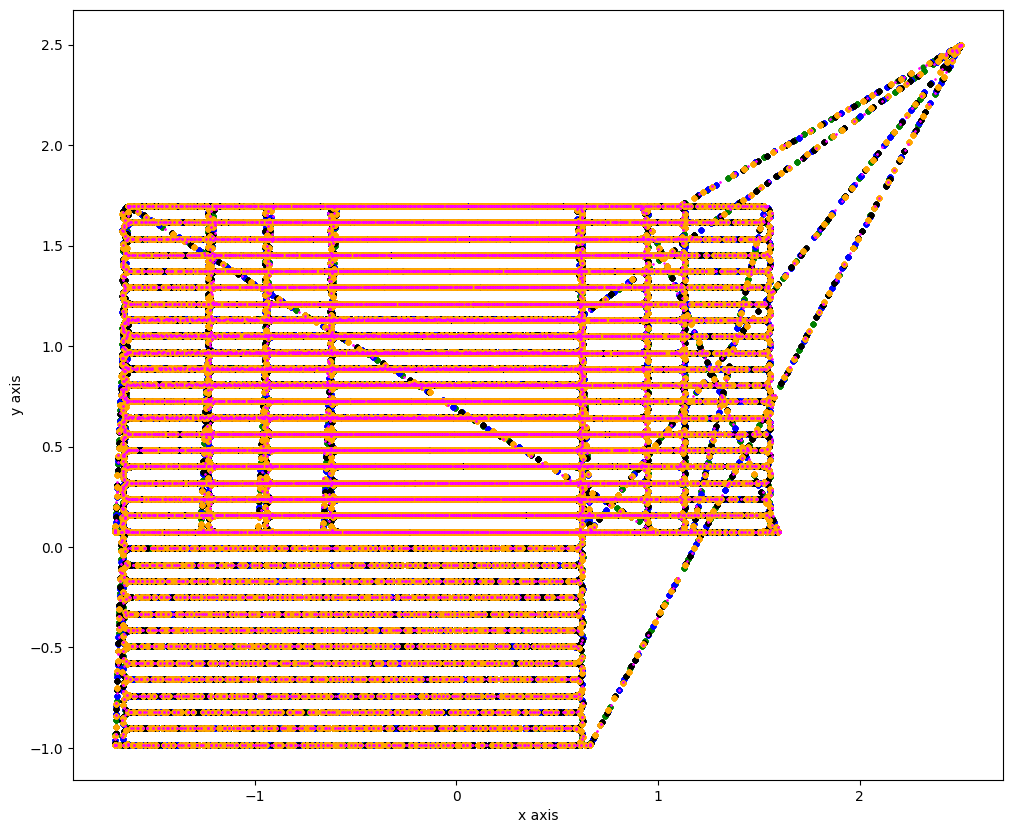

In [238]:
plt.figure(figsize=(12, 10))

plt.scatter(data_good_1_orig['x'], data_good_1_orig['y'], marker='o', s=10, c='g')
plt.scatter(data_good_2_orig['x'], data_good_2_orig['y'], marker='o', s=10, c='b')
plt.scatter(data_good_3_orig['x'], data_good_3_orig['y'], marker='o', s=10, c='black')
plt.scatter(data_good_4_orig['x'], data_good_4_orig['y'], marker='o', s=10, c='orange')

plt.scatter(bad_data_1_orig['x'], bad_data_1_orig['y'], marker='.', s=1, c='magenta', alpha=0.5)

plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()

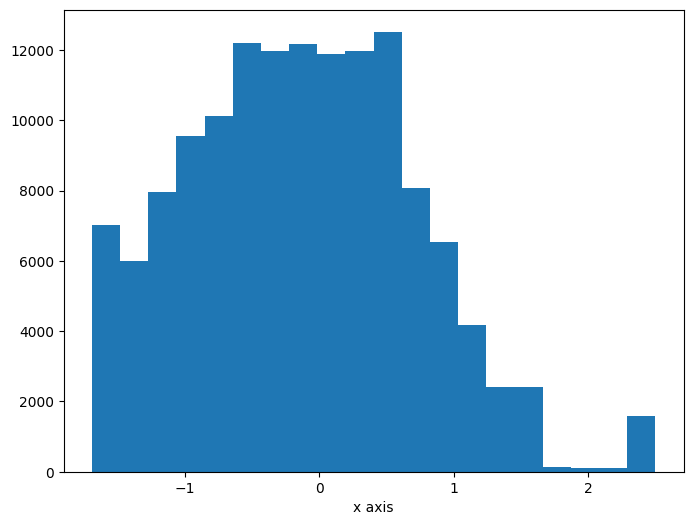

In [239]:
plt.figure(figsize=(8, 6))
plt.hist(data_good_1_orig['x'], bins=20, stacked=True)

plt.xlabel('x axis')
# plt.ylabel('y axis')
plt.show()

<Axes: >

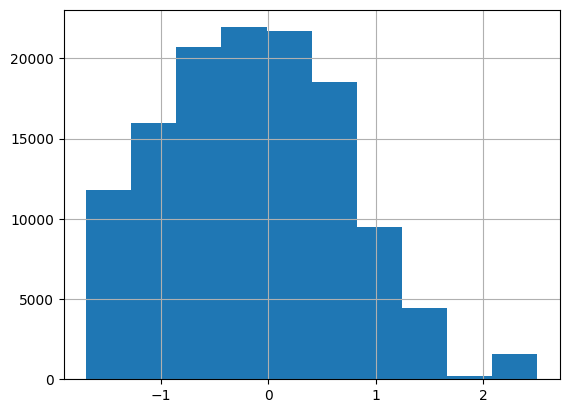

In [240]:
bad_data_1_orig['x'].hist()

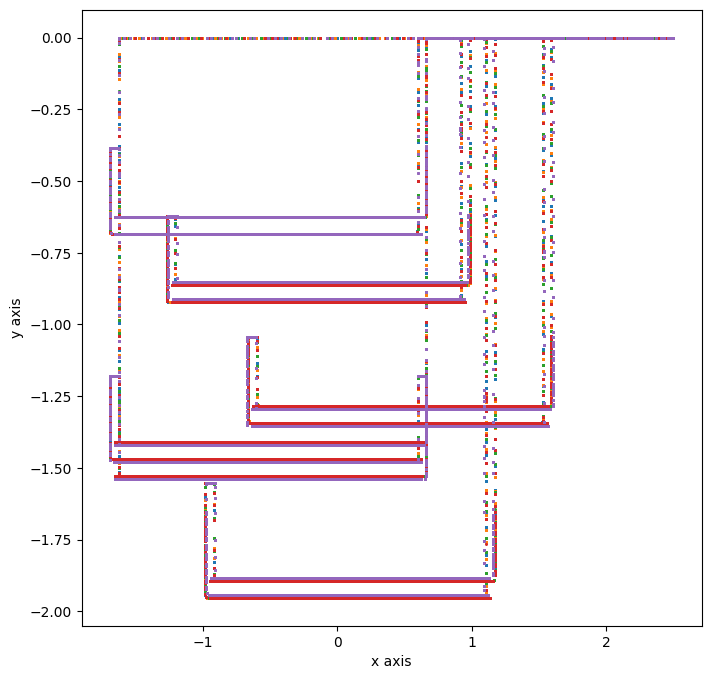

In [574]:
plt.figure(figsize=(8, 8))
plt.scatter(data_good_1_orig['x'], data_good_1_orig['z'], marker='.', s=5)
plt.scatter(data_good_2_orig['x'], data_good_2_orig['z'], marker='.', s=5)
plt.scatter(data_good_3_orig['x'], data_good_3_orig['z'], marker='.', s=5)
plt.scatter(data_good_4_orig['x'], data_good_4_orig['z'], marker='.', s=5)

plt.scatter(bad_data_1_orig['x'], bad_data_1_orig['z'], marker='.', s=5)

plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()

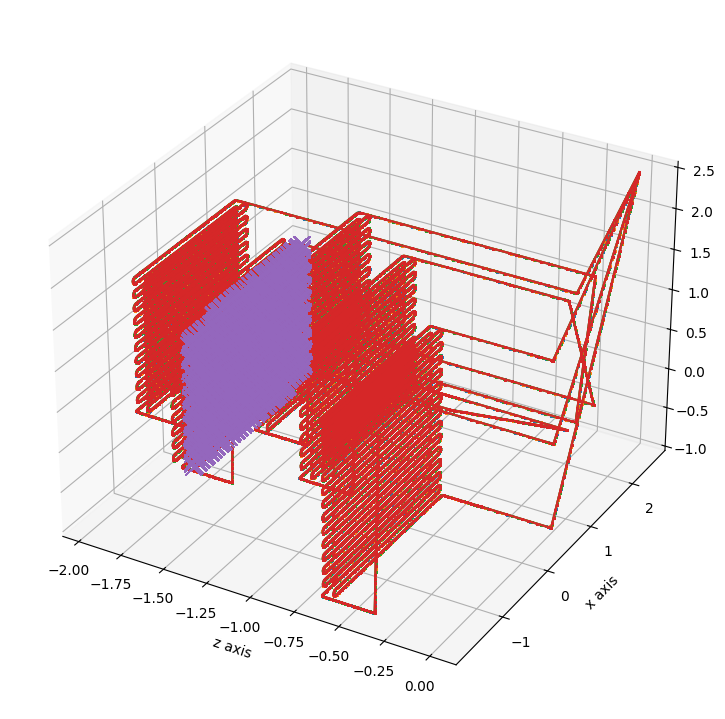

In [584]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
# fig.canvas.draw()
# fig.set_layout_engine("none")
ax.set_position([-0.75, 0.025, 2.5, 1])
# fig = plt.figure()
# ax = Axes3D(fig)
plt.plot(data_good_1_orig['z'], data_good_1_orig['x'], data_good_1_orig['y'], marker='.', markersize=2)
plt.plot(data_good_2_orig['z'], data_good_2_orig['x'], data_good_2_orig['y'], marker='.', markersize=2)
plt.plot(data_good_3_orig['z'], data_good_3_orig['x'], data_good_3_orig['y'], marker='.', markersize=2)
plt.plot(data_good_4_orig['z'], data_good_4_orig['x'], data_good_4_orig['y'], marker='.', markersize=2) # red

plt.plot(bad_data_1_orig['z'].loc[30000:40000], bad_data_1_orig['x'].loc[30000:40000], bad_data_1_orig['y'].loc[30000:40000], marker='x', markersize=12)

plt.xlabel('z axis')
plt.ylabel('x axis')
plt.show()

In [824]:

copy1 = data_good_1_orig.copy()
copy2 = data_good_2_orig.copy()
copy3 = data_good_3_orig.copy()
copy4 = data_good_4_orig.copy()

copy5 = bad_data_1_orig.copy()
# copy4 = copy4 * 1.5

In [825]:
copy1.to_csv('copy1.csv', index=False)
copy2.to_csv('copy2.csv', index=False)
copy3.to_csv('copy3.csv', index=False)
copy4.to_csv('copy4.csv', index=False)
copy5.to_csv('copy5.csv', index=False)

In [827]:
copy1 = pd.read_csv("copy1.csv", delimiter=',')
copy2 = pd.read_csv("copy2.csv", delimiter=',')
copy3 = pd.read_csv("copy3.csv", delimiter=',')
copy4 = pd.read_csv("copy4.csv", delimiter=',')
copy5 = pd.read_csv("copy5.csv", delimiter=',')

In [828]:
copy3

a        b    x    y    z
0       NaN      NaN  NaN  NaN  NaN
1       NaN      NaN  NaN  NaN  NaN
2       NaN      NaN  NaN  NaN  NaN
3       NaN      NaN  NaN  NaN  NaN
4       NaN      NaN  NaN  NaN  NaN
...     ...      ...  ...  ...  ...
129747  0.0  18.4120  2.5  2.5  0.0
129748  0.0  14.9629  2.5  2.5  0.0
129749  0.0  14.9629  2.5  2.5  0.0
129750  0.0  14.9629  2.5  2.5  0.0
129751  0.0  14.9629  2.5  2.5  0.0

[129752 rows x 5 columns]

In [829]:
copy1 = copy1.apply(lambda x: x.dropna().reset_index(drop=True))
copy2 = copy2.apply(lambda x: x.dropna().reset_index(drop=True))
copy3 = copy3.apply(lambda x: x.dropna().reset_index(drop=True))
copy4 = copy4.apply(lambda x: x.dropna().reset_index(drop=True))
copy5 = copy5.apply(lambda x: x.dropna().reset_index(drop=True))

In [910]:
copy1 = copy1.drop(columns=['a', 'b'])
copy2 = copy2.drop(columns=['a', 'b'])
copy3 = copy3.drop(columns=['a', 'b'])
copy4 = copy4.drop(columns=['a', 'b'])
copy5 = copy5.drop(columns=['a', 'b'])

In [911]:
copy4

x       y    z
0       2.5000  2.5000  0.0
1       2.4928  2.4863  0.0
2       2.4928  2.4863  0.0
3       2.4928  2.4863  0.0
4       2.4928  2.4863  0.0
...        ...     ...  ...
127621  2.5000  2.5000  0.0
127622  2.5000  2.5000  0.0
127623  2.5000  2.5000  0.0
127624  2.5000  2.5000  0.0
127625  2.5000  2.5000  0.0

[127626 rows x 3 columns]

In [912]:
# copy1 = copy1.dropna()
# copy2 = copy2.dropna()
# copy3 = copy3.dropna()
# copy4 = copy4.dropna()
# copy5 = copy5.dropna()

In [913]:
copy5

x       y    z
0       2.500  2.5000  0.0
1       2.499  2.4982  0.0
2       2.499  2.4982  0.0
3       2.499  2.4982  0.0
4       2.499  2.4982  0.0
...       ...     ...  ...
126102  2.500  2.5000  0.0
126103  2.500  2.5000  0.0
126104  2.500  2.5000  0.0
126105  2.500  2.5000  0.0
126106  2.500  2.5000  0.0

[126107 rows x 3 columns]

In [914]:
# outliers_fraction = 0.1

# clf = LocalOutlierFactor(n_neighbors=5, contamination='auto')
# y_pred = clf.fit_predict(data_combined)
# y_pred = pd.DataFrame(y_pred)

In [915]:
shuffled_df

z   z   z   z   z
470     0.0 NaN NaN NaN NaN
471     0.0 NaN NaN NaN NaN
472     0.0 NaN NaN NaN NaN
473     0.0 NaN NaN NaN NaN
474     0.0 NaN NaN NaN NaN
...     ...  ..  ..  ..  ..
139453  0.0 NaN NaN NaN NaN
139454  0.0 NaN NaN NaN NaN
139455  0.0 NaN NaN NaN NaN
139456  0.0 NaN NaN NaN NaN
139457  0.0 NaN NaN NaN NaN

[138988 rows x 5 columns]

In [916]:
# plt.figure(figsize=(8, 6))
# plt.scatter(shuffled_df['x'], shuffled_df['y'], color='b', s=0.7)
# # plt.scatter(anomalies['x'], anomalies['y'], color='r', label='Detected Anomalies', s=0.7)
# plt.title('shuffled')
# plt.legend()

# plt.show()

In [917]:
# data_combined = pd.concat([copy1['x'], copy2['x'], copy3['x'], copy4['x'], copy5['x']], axis=1)
# data_combinedy = np.concatenate([copy1['y'], copy2['y'], copy3['y'], copy4['y'], copy5['y']], axis=0)
# data_combinedz = np.concatenate([copy1['z'], copy2['z'], copy3['z'], copy4['z'], copy5['z']], axis=0)

# data_combined = pd.DataFrame(data_combined)
# data_combinedy = pd.DataFrame(data_combinedy)
# data_combinedz= pd.DataFrame(data_combinedz)


# data_combinedxyz = np.concatenate([data_combined, data_combinedy, data_combinedz], axis=1)
# data_combinedxy = pd.DataFrame(data_combinedxyz)
# data_combinedxy.columns = ['x', 'y', 'z']

# data_xy_copy = data_combinedxy.copy()

Beginning of knn data

In [659]:
data_combined = pd.concat([copy1['x'], copy2['x'], copy3['x'], copy4['x'], copy5['x']], axis=1)
data_combinedy = pd.concat([copy1['y'], copy2['y'], copy3['y'], copy4['y'], copy5['y']], axis=1)
data_combinedz = pd.concat([copy1['z'], copy2['z'], copy3['z'], copy4['z'], copy5['z']], axis=1)

data_combined = pd.DataFrame(data_combined)
data_combinedy = pd.DataFrame(data_combinedy)
data_combinedz= pd.DataFrame(data_combinedz)


# data_combinedxyz = np.concatenate([data_combined, data_combinedy, data_combinedz], axis=1)
data_combinedxy = pd.DataFrame(data_combinedz)
# data_combinedxy.columns = ['x', 'y', 'z']

data_xy_copy = data_combinedxy.copy()
shuffled_df = data_combinedxy.copy()

array([[<Axes: title={'center': 'x'}>, <Axes: title={'center': 'x'}>],
       [<Axes: title={'center': 'x'}>, <Axes: title={'center': 'x'}>],
       [<Axes: title={'center': 'x'}>, <Axes: >]], dtype=object)

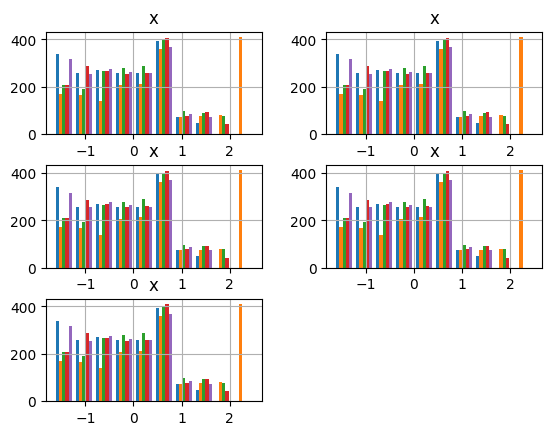

In [660]:
data_combined[:2500].hist()

In [661]:
data_combined

x   x   x   x   x
470     2.5 NaN NaN NaN NaN
471     2.5 NaN NaN NaN NaN
472     2.5 NaN NaN NaN NaN
473     2.5 NaN NaN NaN NaN
474     2.5 NaN NaN NaN NaN
...     ...  ..  ..  ..  ..
139453  2.5 NaN NaN NaN NaN
139454  2.5 NaN NaN NaN NaN
139455  2.5 NaN NaN NaN NaN
139456  2.5 NaN NaN NaN NaN
139457  2.5 NaN NaN NaN NaN

[138988 rows x 5 columns]

In [662]:
data_combinedxy = data_combinedxy.apply(lambda x: x.dropna().reset_index(drop=True))

In [663]:
data_combinedxy = data_combinedxy.apply(lambda x: x.dropna().reset_index(drop=True))
data_combinedxy = data_combinedxy.dropna()

In [664]:
data_combinedxy

z       z       z       z    z
0       0.0000  0.0000  0.0000  0.0000  0.0
1       0.0000  0.0000  0.0000  0.0000  0.0
2       0.0000  0.0000  0.0000  0.0000  0.0
3       0.0000  0.0000  0.0000  0.0000  0.0
4       0.0000  0.0000  0.0000  0.0000  0.0
...        ...     ...     ...     ...  ...
126447 -1.8938 -1.9529 -1.9529 -0.5214  0.0
126448 -1.8938 -1.9529 -1.9529 -0.5214  0.0
126449 -1.8938 -1.9529 -1.9529 -0.4814  0.0
126450 -1.8938 -1.9529 -1.9529 -0.4814  0.0
126451 -1.8938 -1.9529 -1.9529 -0.4814  0.0

[126452 rows x 5 columns]

In [665]:
data_combined

x   x   x   x   x
470     2.5 NaN NaN NaN NaN
471     2.5 NaN NaN NaN NaN
472     2.5 NaN NaN NaN NaN
473     2.5 NaN NaN NaN NaN
474     2.5 NaN NaN NaN NaN
...     ...  ..  ..  ..  ..
139453  2.5 NaN NaN NaN NaN
139454  2.5 NaN NaN NaN NaN
139455  2.5 NaN NaN NaN NaN
139456  2.5 NaN NaN NaN NaN
139457  2.5 NaN NaN NaN NaN

[138988 rows x 5 columns]

In [ ]:
# data_combinedxy.to_csv('data_combinedxy.csv', index=False)
# data_combinedxy.to_csv('data_combinedz.csv', index=False)

In [ ]:
# data_combinedxy = pd.read_csv("data_combinedxy.csv", delimiter=',')
data_combinedxy = pd.read_csv("data_combinedz.csv", delimiter=',')

In [668]:
data_combinedxy = data_combinedxy.apply(lambda x: x.dropna().reset_index(drop=True))
data_combinedxy = data_combinedxy.dropna()

In [670]:
data_combinedxy

z     z.1     z.2     z.3     z.4
0       0.0000  0.0000  0.0000  0.0000  0.0000
1      -0.0060 -0.0171 -0.0020 -0.0003 -0.0061
2      -0.0060 -0.0171 -0.0020 -0.0003 -0.0061
3      -0.0060 -0.0171 -0.0020 -0.0003 -0.0061
4      -0.0060 -0.0171 -0.0020 -0.0003 -0.0061
...        ...     ...     ...     ...     ...
125670 -1.8938 -1.9529 -1.9529 -0.7163  0.0000
125671 -1.8938 -1.9529 -1.9529 -0.7163  0.0000
125672 -1.8938 -1.9529 -1.9529 -0.6584  0.0000
125673 -1.8938 -1.9529 -1.9529 -0.6584  0.0000
125674 -1.8938 -1.9529 -1.9529 -0.6584  0.0000

[125675 rows x 5 columns]

In [671]:
p_data_df = data_combinedxy
xy_groups = 2500
xy_splits = {}

for i in range(0, xy_groups, 1):
    p_data_split = p_data_df[(len(p_data_df)//xy_groups)*(i):(len(p_data_df)//xy_groups)*(i+1)] # splits shuffled data into groups
    xy_splits[f'split_{i}'] = pd.DataFrame(p_data_split)


pocket_split_std_features = {}
pocket_split_mean_features = {}

for i in range(0, xy_groups, 1):
    p_data_std_features = pd.DataFrame(xy_splits[f'split_{i}']).std()
    pocket_split_std_features[f'split_{i}'] = p_data_std_features

for i in range(0, xy_groups, 1):
    p_data_mean_features = pd.DataFrame(xy_splits[f'split_{i}']).mean()
    pocket_split_mean_features[f'split_{i}'] = p_data_mean_features


In [672]:
xy_splits['split_20']

z     z.1     z.2     z.3     z.4
1000 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1001 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1002 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1003 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1004 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1005 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1006 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1007 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1008 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1009 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1010 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1011 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1012 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1013 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1014 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1015 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1016 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1017 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1018 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1019 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1020 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1021 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1022 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1023 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1024 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1025 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1026 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1027 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1028 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1029 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1030 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1031 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1032 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1033 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1034 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1035 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1036 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1037 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1038 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1039 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1040 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1041 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1042 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1043 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1044 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1045 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1046 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1047 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1048 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243
1049 -0.6243 -0.6243 -0.6243 -0.6243 -0.6243

<Axes: >

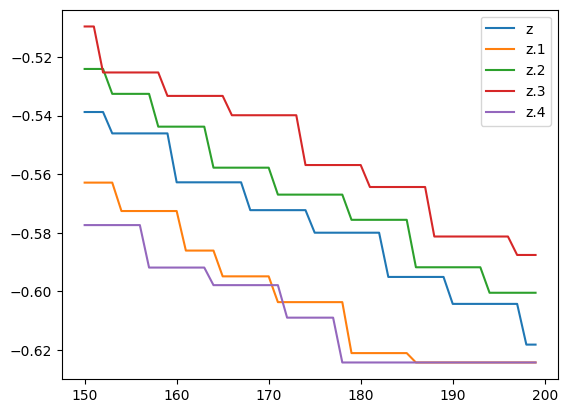

In [673]:
xy_splits['split_3'].plot()

<Axes: >

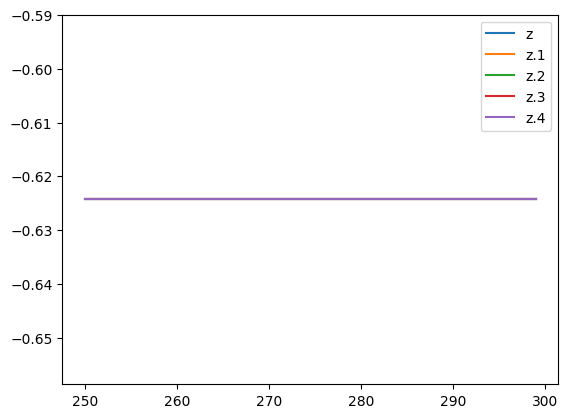

In [674]:
xy_splits['split_5'].plot()


In [675]:
xy_splits

{'split_0':          z     z.1     z.2     z.3     z.4
 0   0.0000  0.0000  0.0000  0.0000  0.0000
 1  -0.0060 -0.0171 -0.0020 -0.0003 -0.0061
 2  -0.0060 -0.0171 -0.0020 -0.0003 -0.0061
 3  -0.0060 -0.0171 -0.0020 -0.0003 -0.0061
 4  -0.0060 -0.0171 -0.0020 -0.0003 -0.0061
 5  -0.0060 -0.0171 -0.0020 -0.0003 -0.0061
 6  -0.0060 -0.0171 -0.0020 -0.0003 -0.0061
 7  -0.0060 -0.0171 -0.0020 -0.0003 -0.0061
 8  -0.0290 -0.0171 -0.0020 -0.0003 -0.0061
 9  -0.0290 -0.0171 -0.0558 -0.0150 -0.0061
 10 -0.0290 -0.0171 -0.0558 -0.0150 -0.0802
 11 -0.0290 -0.0171 -0.0558 -0.0150 -0.0802
 12 -0.0290 -0.0171 -0.0558 -0.0150 -0.0802
 13 -0.0290 -0.0171 -0.0558 -0.0150 -0.0802
 14 -0.0290 -0.1225 -0.0558 -0.0150 -0.0802
 15 -0.1167 -0.1225 -0.0558 -0.0150 -0.0802
 16 -0.1167 -0.1225 -0.1049 -0.0150 -0.1241
 17 -0.1167 -0.1225 -0.1049 -0.0765 -0.1241
 18 -0.1167 -0.1225 -0.1049 -0.0765 -0.1241
 19 -0.1167 -0.1225 -0.1049 -0.0765 -0.1241
 20 -0.1167 -0.1225 -0.1049 -0.0765 -0.1241
 21 -0.1167 -0.1225 -

In [676]:
# def batch_parser(batch_dict):
#     print("Testing")

#     split_features = {}

#     for i in range(0, 500, 1):
#         data_features = pd.DataFrame(batch_dict[f'split_{i}']).mean()
#         split_features[f'split_{i}'] = data_features
#         # data_features[i] = data_features

#     data_features_df = pd.DataFrame.from_dict(split_features, orient='index')

#     return data_features_df

In [677]:
# batch_df = batch_parser(xy_splits)

In [678]:
# batch_df.head()

In [679]:
# for i in range(0, 500, 1):
#     data_features = batch_df.iloc[i]
#     #split_features[f'split_{i}'] = data_features
#     print(data_features)
    

In [680]:


# def anomaly_detection(i):
#     print(f"Task executed at {time.ctime()}")
#     print("Testing")

    
#     split_features = {}

#     # for i in range(0, 500, 1):
    
#     data_features = pd.DataFrame(xy_splits[f'split_{i}']) #.mean()
#     # split_features[f'split_{i}'] = data_features
    
#     split_features = data_features
#     i += 1

#     print("split_features: ", split_features)
    
#     # data_features_df = pd.DataFrame.from_dict(split_features, orient='index')
    
#     df = split_features
#     print("df: ", df)
#     clf = LocalOutlierFactor(n_neighbors=15, contamination='auto')
#     y_pred = clf.fit_predict(df)

#     df['anomaly'] = y_pred
    
#     # df = np.concatenate([df, data_features], axis=0)
    
#     # Plot the normal points
#     normal_points = df[df['anomaly'] == 1]
#     # Plot the anomalies
#     anomalies = df[df['anomaly'] == -1]

#     # # Plot original data
#     # axs[0].scatter(df['x1'][:n_inliers], df['x2'][:n_inliers], color='b', label='Normal Points')
#     # axs[0].scatter(df['x1'][n_inliers:], df['x2'][n_inliers:], color='grey', label='Actual Anomalies')
#     # axs[0].set_title('Original Data')
#     # axs[0].legend()

#     plt.figure(figsize=(12, 10))
#     plt.scatter(normal_points['x'], normal_points['y'], color='b', label='Normal Points', s=0.7)
#     plt.scatter(anomalies['x'], anomalies['y'], color='r', label='Detected Anomalies', s=0.7)
#     plt.title('Anomaly Detection Results with k-NN')
#     plt.legend()
#     plt.show()
#     return i

# def indexer():
#     anomaly_detection(xy_splits, 1)
#     # j = 0
#     return anomaly_detection(xy_splits, 1)

# # schedule.every(5).seconds.do(batch_parser(xy_splits))
# # schedule.every(5).seconds.do(indexer())
# schedule.every(5).seconds.do(anomaly_detection)

# while True:
#     schedule.run_pending()
#     time.sleep(1)


In [822]:
df = data_combinedxy.iloc[0:2]
df.T


0       1
z    0.0 -0.0060
z.1  0.0 -0.0171
z.2  0.0 -0.0020
z.3  0.0 -0.0003
z.4  0.0 -0.0061

Group first line of each historic dataset row by row and add first line of new df at the end. In this example there would be 4 historic and 1 new

In [918]:
copy1
copy2
copy3
copy4

copy5

x       y    z
0       2.500  2.5000  0.0
1       2.499  2.4982  0.0
2       2.499  2.4982  0.0
3       2.499  2.4982  0.0
4       2.499  2.4982  0.0
...       ...     ...  ...
126102  2.500  2.5000  0.0
126103  2.500  2.5000  0.0
126104  2.500  2.5000  0.0
126105  2.500  2.5000  0.0
126106  2.500  2.5000  0.0

[126107 rows x 3 columns]

In [919]:
copy1.head(5)

x       y    z
0  2.5000  2.5000  0.0
1  2.4984  2.4969  0.0
2  2.4984  2.4969  0.0
3  2.4984  2.4969  0.0
4  2.4984  2.4969  0.0

In [920]:
copy2.head(5)

x       y    z
0  2.5000  2.5000  0.0
1  2.4997  2.4994  0.0
2  2.4997  2.4994  0.0
3  2.4997  2.4994  0.0
4  2.4997  2.4994  0.0

In [921]:
copy3.head(5)

x       y    z
0  2.5000  2.5000  0.0
1  2.4922  2.4852  0.0
2  2.4922  2.4852  0.0
3  2.4922  2.4852  0.0
4  2.4922  2.4852  0.0

In [922]:
copy4.head(5)

x       y    z
0  2.5000  2.5000  0.0
1  2.4928  2.4863  0.0
2  2.4928  2.4863  0.0
3  2.4928  2.4863  0.0
4  2.4928  2.4863  0.0

In [923]:
copy5.head(5)

x       y    z
0  2.500  2.5000  0.0
1  2.499  2.4982  0.0
2  2.499  2.4982  0.0
3  2.499  2.4982  0.0
4  2.499  2.4982  0.0

In [924]:
grouped_copies = [] # pd.DataFrame()

for i in range(0, 10, 1): # replace with length of smallest historic dataset
    row1 = copy1.iloc[i]
    row2 = copy2.iloc[i]
    row3 = copy3.iloc[i]
    row4 = copy4.iloc[i]
    row5 = copy5.iloc[i]

    grouped_copies.append(pd.concat([row1, row2, row3, row4, row5], axis=1)) # = pd.concat([row1, row2, row3, row4, row5], axis=1)
    

In [1007]:
# xy_groups = 2500
grouped_copies = {}

for i in range(30000, 31000, 1):
    # p_data_split = p_data_df[(len(p_data_df)//xy_groups)*(i):(len(p_data_df)//xy_groups)*(i+1)] # splits shuffled data into groups

    row1 = copy1.iloc[i]
    row2 = copy2.iloc[i]
    row3 = copy3.iloc[i]
    row4 = copy4.iloc[i]
    row5 = copy5.iloc[i]


    grouped_copies[f'split_{i}'] = pd.concat([row1, row2, row3, row4, row5], axis=1)
    grouped_copies[f'split_{i}'] = grouped_copies[f'split_{i}'].T


In [1018]:
grouped_copies['split_30000']

x       y       z
30000 -0.1818  1.0537 -0.6834
30000 -1.3749  0.3197 -1.4114
30000  0.6612  0.0767 -1.2706
30000 -1.3085  0.1577 -1.4114
30000  0.3385  0.1577 -1.4214

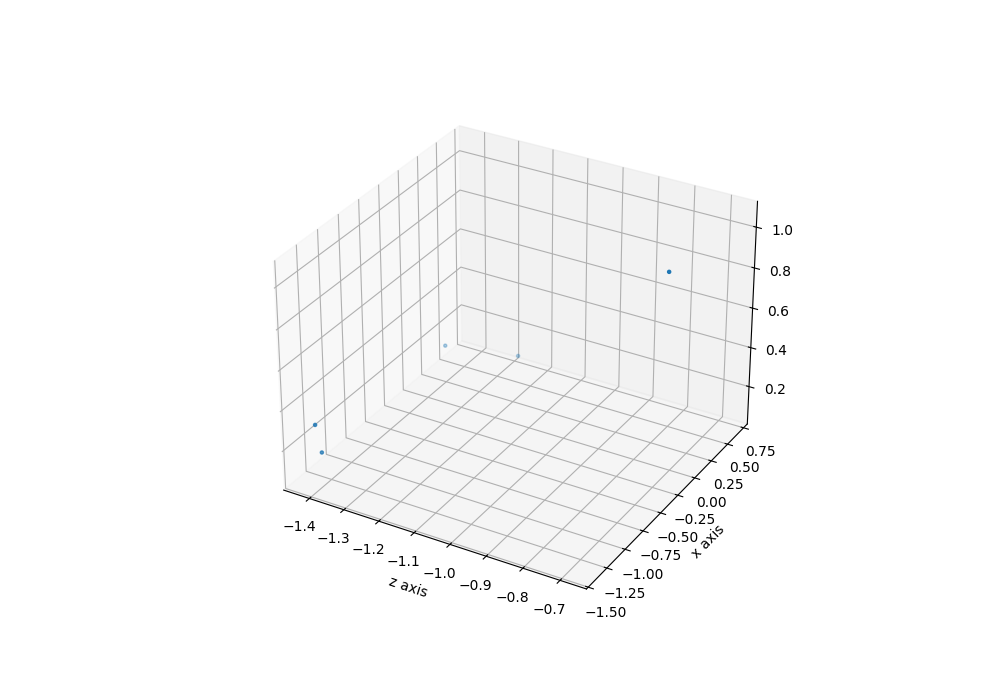

In [1046]:
%matplotlib widget

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for i in range(30000, 30001, 1):
    # print("testing", i)
    ax.scatter(grouped_copies[f'split_{i}']['z'], grouped_copies[f'split_{i}']['x'], grouped_copies[f'split_{i}']['y'], marker='.', s=20)

plt.xlabel('z axis')
plt.ylabel('x axis')
plt.show()


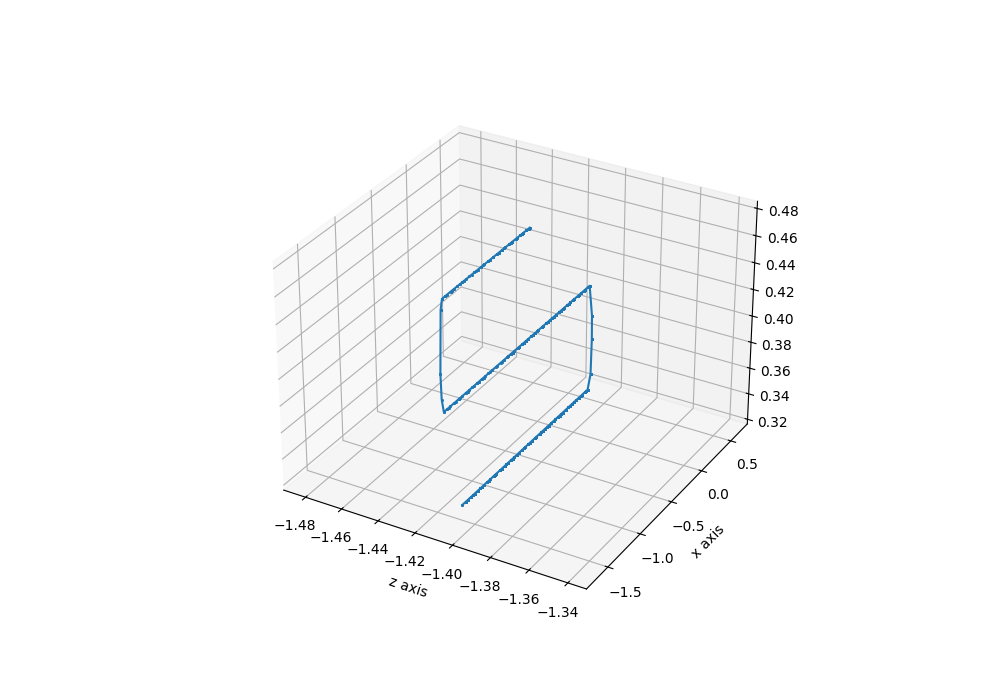

In [1042]:
%matplotlib widget

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(copy2['z'].iloc[30000:31000], copy2['x'].iloc[30000:31000], copy2['y'].iloc[30000:31000], marker='.', markersize=2)

plt.xlabel('z axis')
plt.ylabel('x axis')
plt.show()

In [1055]:
print(grouped_copies['split_30000'])

            x       y       z
30000 -0.1818  1.0537 -0.6834
30000 -1.3749  0.3197 -1.4114
30000  0.6612  0.0767 -1.2706
30000 -1.3085  0.1577 -1.4114
30000  0.3385  0.1577 -1.4214


In [1019]:
def e_distance(x, y, z, i, j, k):

    distance = np.sqrt((x-i)**2 + (y-j)**2 + (z-k)**2)

    return distance

In [1061]:
print(e_distance(-0.1818, 1.0537, -0.634, -1.3749, 0.3197, -1.4114)) # 1 2
print(e_distance(-0.1818, 1.0537, -0.634, 0.6612,  0.0767, -1.2706)) # 1 3
print(e_distance(-0.1818, 1.0537, -0.634, -1.3085,  0.1577, -1.4114)) # 1 4
print(e_distance(-0.1818, 1.0537, -0.634, -0.3385,  0.1577, -1.4214)) # 1 5
print(" ")
print(e_distance(-1.3749,  0.3197, -1.4114, 0.6612,  0.0767, -1.2706)) # 2 3
print(e_distance(-1.3749,  0.3197, -1.4114, -1.3085,  0.1577, -1.4114)) # 2 4
print(e_distance(-1.3749,  0.3197, -1.4114, 0.3385,  0.1577, -1.4214)) # 2 5
print(" ")
print(e_distance(0.6612,  0.0767, -1.2706, -1.3085,  0.1577, -1.4114)) # 3 4
print(e_distance(0.6612,  0.0767, -1.2706, 0.3385,  0.1577, -1.4214)) # 3 5
print(" ")
print(e_distance(-1.3085,  0.1577, -1.4114, 0.3385,  0.1577, -1.4214)) # 4 5


1.6020594152527552
1.4389015115705452
1.6360377899058445
1.2030667687206726
 
2.055377544394217
0.17507986748909765
1.7210704692138554
 
1.9763865335505604
0.36529019970428994
 
1.6470303579472967


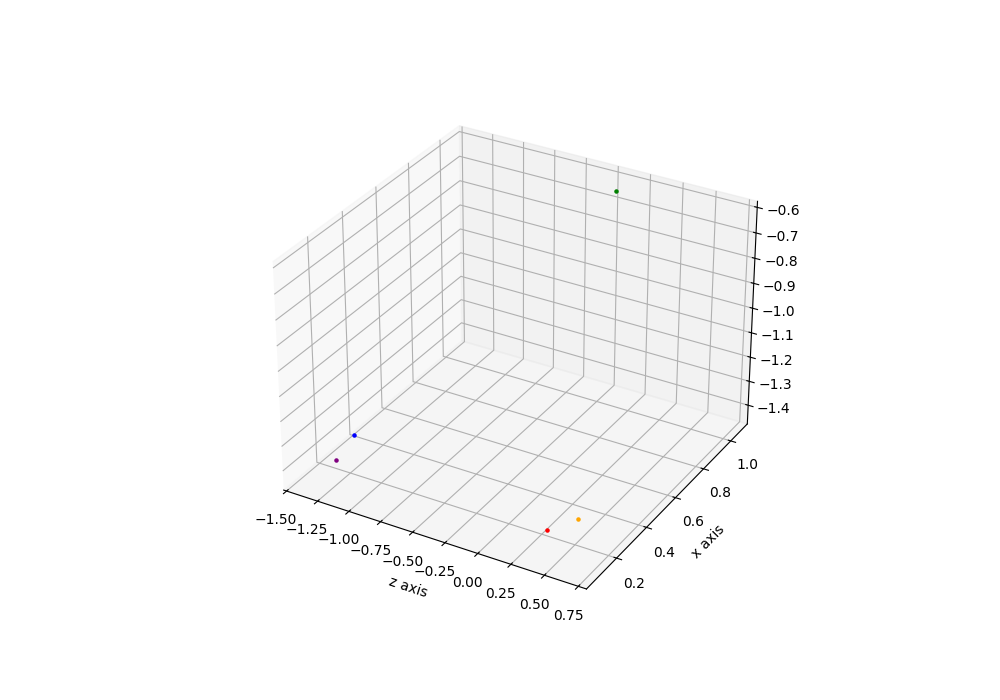

In [ ]:
%matplotlib widget

fig = plt.figure(figsize=(10, 7)) # split_30000 why is green not flagged
ax = fig.add_subplot(projection='3d')
ax.scatter(-0.1818, 1.0537, -0.634, s=20, marker='.', c='g')
ax.scatter(-1.3749, 0.3197, -1.4114, s=20, marker='.', c='b') 
ax.scatter(0.6612,  0.0767, -1.2706, s=20, marker='.', c='orange')
ax.scatter(-1.3085,  0.1577, -1.4114, s=20, marker='.', c='purple')
ax.scatter(0.3385,  0.1577, -1.4214, s=20, marker='.', c='r')

plt.xlabel('z axis')
plt.ylabel('x axis')
plt.show()


In [1004]:
grouped_copies['split_30000']

x       y       z
30000 -0.1818  1.0537 -0.6834
30000 -1.3749  0.3197 -1.4114
30000  0.6612  0.0767 -1.2706
30000 -1.3085  0.1577 -1.4114
30000  0.3385  0.1577 -1.4214

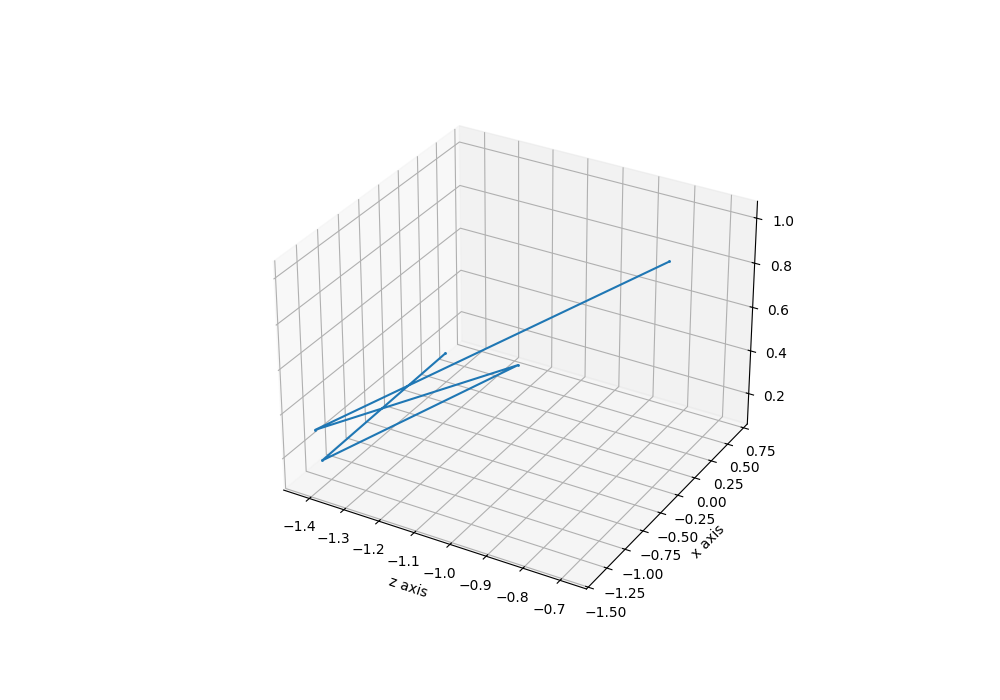

In [1003]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
# fig.canvas.draw()
# fig.set_layout_engine("none")
# ax.set_position([-0.75, 0.025, 2.5, 1])
# fig = plt.figure()
# ax = Axes3D(fig)
plt.plot(grouped_copies['split_30000']['z'], grouped_copies['split_30000']['x'], grouped_copies['split_30000']['y'], marker='.', markersize=2)
plt.xlabel('z axis')
plt.ylabel('x axis')
plt.show()

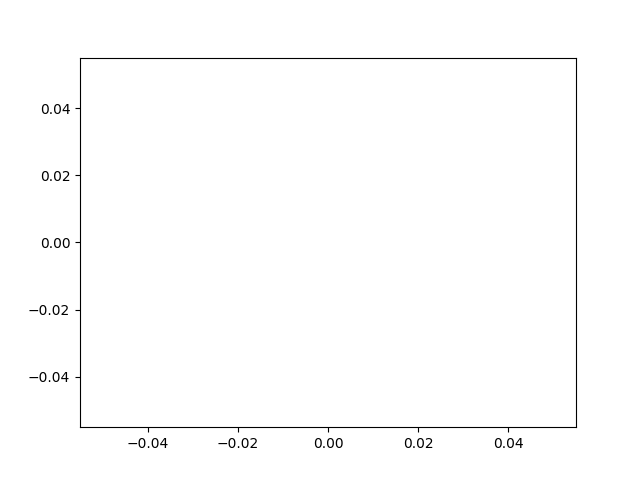

3
0
   30000  30001  30002  30003  30004  30005  30006  30007  30008  30009  ...  \
0      1      1      1      1      1      1      1      1      1      1  ...   
1      1      1      1      1      1      1      1      1      1      1  ...   
2      1      1      1      1      1      1      1      1      1      1  ...   

   30040  30041  30042  30043  30044  30045  30046  30047  30048  30049  
0      1      1      1      1      1      1      1      1      1      1  
1      1      1      1      1      1      1      1      1      1      1  
2      1      1      1      1      1      1      1      1      1      1  

[3 rows x 50 columns]
y-pred anomaly:     anomaly
0        1
1        1
2        1


In [1047]:
i = 0

split_features = {}


# for i in range(0, 500, 1):
data_features = pd.DataFrame(xy_splits[f'split_{i}']) #.mean()
split_features[f'split_{i}'] = data_features

# split_features = data_features

# data_features_df = pd.DataFrame.from_dict(split_features, orient='index')
df = split_features[f'split_{0}']

fig, ax = plt.subplots()
scatter1 = ax.scatter([], []) # Initialize an empty scatter plot
scatter2 = ax.scatter([], []) # Initialize an empty scatter plot

# Plot the normal points
normal_points = pd.DataFrame()
# Plot the anomalies
anomalies = pd.DataFrame()

loop_batch = pd.DataFrame()

df_copy = pd.DataFrame()

for i in range(30000, 30050, 1): # range(30000, 30020, 1):

    # df = pd.DataFrame(np.concatenate([xy_splits[f'split_{i - 1}'], xy_splits[f'split_{i}']], axis=0))
    

    # for i in range(1, 200, 1):
    # p_data_std_features = pd.DataFrame(xy_splits[f'split_{i}'])
    # pocket_split_std_features[f'split_{i}'] = p_data_std_features
    
    df = grouped_copies[f'split_{i}'] # data_combinedxy.iloc[i-1:i]
    # df_copy[f'batch {i}'] = df

    clf = LocalOutlierFactor(n_neighbors=2, contamination='auto')
    y_pred = clf.fit_predict(df.T)

    df_anom = pd.DataFrame()
    # df['anomaly'] = y_pred
    df_anom['anomaly'] = y_pred
    
    
    # df = np.concatenate([df, data_features], axis=0)
    
    # Plot the normal points
    # normal_points.append(df_anom[df_anom['anomaly'] == 1])
    # # Plot the anomalies
    # anomalies.append(df_anom[df_anom['anomaly'] == -1])


    normal_points[f'batch {i}'] = df_anom[df_anom['anomaly'] == 1]
    # # Plot the anomalies
    anomalies[f'batch {i}'] = df_anom[df_anom['anomaly'] == -1]

    loop_batch[f'{i}'] = df_anom
    # plt.figure().clear()
    # fig = plt.figure()
    # plt.figure(figsize=(12, 10))
    # scatter1 = ax.scatter(normal_points[0], normal_points[1], color='b', label='Normal Points', s=0.7)
    # scatter2 = ax.scatter(anomalies[0], anomalies[1], color='r', label='Detected Anomalies', s=0.7)

    # plt.scatter(normal_points[0], normal_points[1], color='b', label='Normal Points', s=0.7)
    # plt.scatter(anomalies[0], anomalies[1], color='r', label='Detected Anomalies', s=0.7)

    # scatter1.set_offsets(np.c_[normal_points[0], normal_points[1]])
    # scatter2.set_offsets(np.c_[anomalies[0], anomalies[1]])

    # plt.title('Anomaly Detection Results with k-NN')
    # plt.show()
    fig.canvas.draw_idle()
    fig.canvas.flush_events()
    # plt.figure().clear()
    # plt.pause(0.05)
    time.sleep(0.5) # Pause for 0.5 seconds
    # plt.draw()
    # to flush the GUI events
    # plt.figure().canvas.flush_events()
    # time.sleep(1)

# plt.ioff()  # Turn off interactive mode
plt.show()
print(len(normal_points))
print(len(anomalies))
print(loop_batch)
print("y-pred anomaly: ", df_anom)
loop_batch = loop_batch.T
normal_points = normal_points.T
anomalies = anomalies.T


In [1048]:
df_copy

Empty DataFrame
Columns: []
Index: []

In [1049]:
y_pred

array([1, 1, 1])

In [1050]:
loop_batch

0  1  2
30000  1  1  1
30001  1  1  1
30002  1  1  1
30003  1  1  1
30004  1  1  1
30005  1  1  1
30006  1  1  1
30007  1  1  1
30008  1  1  1
30009  1  1  1
30010  1  1  1
30011  1  1  1
30012  1  1  1
30013  1  1  1
30014  1  1  1
30015  1  1  1
30016  1  1  1
30017  1  1  1
30018  1  1  1
30019  1  1  1
30020  1  1  1
30021  1  1  1
30022  1  1  1
30023  1  1  1
30024  1  1  1
30025  1  1  1
30026  1  1  1
30027  1  1  1
30028  1  1  1
30029  1  1  1
30030  1  1  1
30031  1  1  1
30032  1  1  1
30033  1  1  1
30034  1  1  1
30035  1  1  1
30036  1  1  1
30037  1  1  1
30038  1  1  1
30039  1  1  1
30040  1  1  1
30041  1  1  1
30042  1  1  1
30043  1  1  1
30044  1  1  1
30045  1  1  1
30046  1  1  1
30047  1  1  1
30048  1  1  1
30049  1  1  1

In [1051]:
normal_points

0  1  2
batch 30000  1  1  1
batch 30001  1  1  1
batch 30002  1  1  1
batch 30003  1  1  1
batch 30004  1  1  1
batch 30005  1  1  1
batch 30006  1  1  1
batch 30007  1  1  1
batch 30008  1  1  1
batch 30009  1  1  1
batch 30010  1  1  1
batch 30011  1  1  1
batch 30012  1  1  1
batch 30013  1  1  1
batch 30014  1  1  1
batch 30015  1  1  1
batch 30016  1  1  1
batch 30017  1  1  1
batch 30018  1  1  1
batch 30019  1  1  1
batch 30020  1  1  1
batch 30021  1  1  1
batch 30022  1  1  1
batch 30023  1  1  1
batch 30024  1  1  1
batch 30025  1  1  1
batch 30026  1  1  1
batch 30027  1  1  1
batch 30028  1  1  1
batch 30029  1  1  1
batch 30030  1  1  1
batch 30031  1  1  1
batch 30032  1  1  1
batch 30033  1  1  1
batch 30034  1  1  1
batch 30035  1  1  1
batch 30036  1  1  1
batch 30037  1  1  1
batch 30038  1  1  1
batch 30039  1  1  1
batch 30040  1  1  1
batch 30041  1  1  1
batch 30042  1  1  1
batch 30043  1  1  1
batch 30044  1  1  1
batch 30045  1  1  1
batch 30046  1  1  1
batch 30047  1  1  1
batch 30048  1  1  1
batch 30049  1  1  1

In [1052]:
anomalies

Empty DataFrame
Columns: []
Index: [batch 30000, batch 30001, batch 30002, batch 30003, batch 30004, batch 30005, batch 30006, batch 30007, batch 30008, batch 30009, batch 30010, batch 30011, batch 30012, batch 30013, batch 30014, batch 30015, batch 30016, batch 30017, batch 30018, batch 30019, batch 30020, batch 30021, batch 30022, batch 30023, batch 30024, batch 30025, batch 30026, batch 30027, batch 30028, batch 30029, batch 30030, batch 30031, batch 30032, batch 30033, batch 30034, batch 30035, batch 30036, batch 30037, batch 30038, batch 30039, batch 30040, batch 30041, batch 30042, batch 30043, batch 30044, batch 30045, batch 30046, batch 30047, batch 30048, batch 30049]

In [1053]:
# df_copy = df_copy.drop


# df_copy = pd.DataFrame(df_copy, columns=['z', 'z.1', 'z.2', 'z.3', 'z.4'])

AttributeError: 'Axes3D' object has no attribute 'scater'

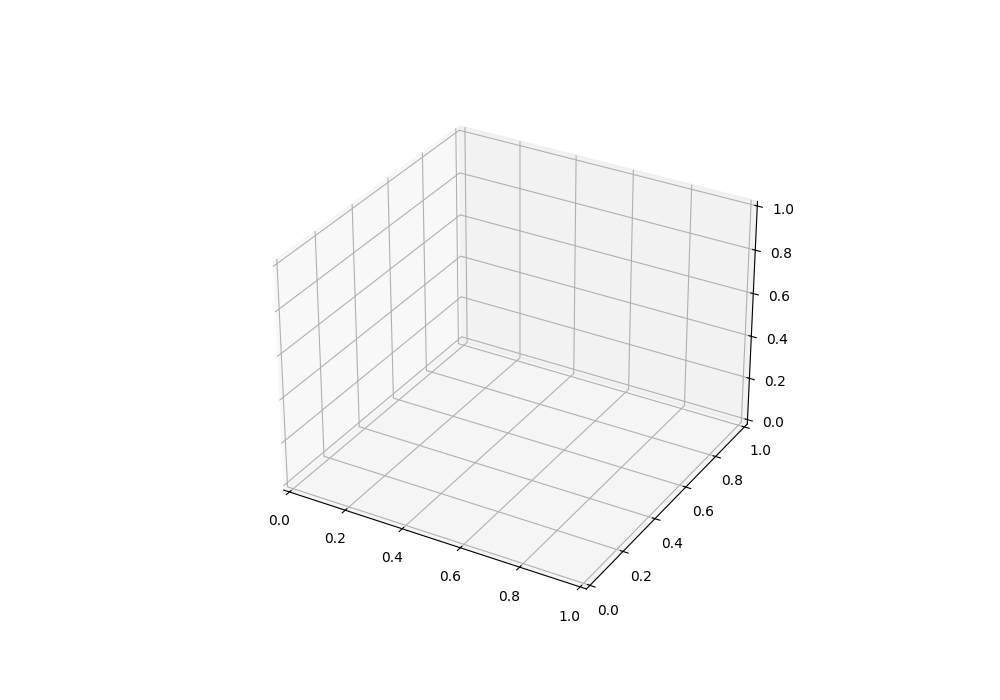

In [1054]:

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
# fig.canvas.draw()
# fig.set_layout_engine("none")
# ax.set_position([-0.75, 0.025, 2.5, 1]) 

# Plot the normal points
# normal_points = data_combinedxy[data_combinedxy['anomaly'] == 1]
# Plot the anomalies
# anomalies = data_combinedxy[data_combinedxy['anomaly'] == -1]

# # Plot original data
# axs[0].scatter(df['x1'][:n_inliers], df['x2'][:n_inliers], color='b', label='Normal Points')
# axs[0].scatter(df['x1'][n_inliers:], df['x2'][n_inliers:], color='grey', label='Actual Anomalies')
# axs[0].set_title('Original Data')
# axs[0].legend()

# plt.figure(figsize=(12, 10))
ax.scater(loop_batch[0], loop_batch[1], loop_batch[2], marker='.', \
          color='b', label='Normal Points', markersize=5)
# ax.plot(anomalies[0], anomalies[1], anomalies[2], marker='x', \
#          color='r', label='Detected Anomalies', markersize=5)
plt.title('Anomaly Detection Results with k-NN')
plt.legend()

plt.show()
print(len(normal_points))
print(len(anomalies))

In [714]:
copy4

a    b    x    y    z
564     0.0000  0.0  2.5  2.5  0.0
565     0.0007  0.0  2.5  2.5  0.0
566     0.0007  0.0  2.5  2.5  0.0
567     0.0007  0.0  2.5  2.5  0.0
568     0.0007  0.0  2.5  2.5  0.0
...        ...  ...  ...  ...  ...
128559  0.0000  0.0  2.5  2.5  0.0
128560  0.0000  0.0  2.5  2.5  0.0
128561  0.0000  0.0  2.5  2.5  0.0
128562  0.0000  0.0  2.5  2.5  0.0
128563  0.0000  0.0  2.5  2.5  0.0

[128000 rows x 5 columns]

In [387]:
data_combinedxy

x     x.1     x.2     x.3    x.4
0       2.5000  2.5000  2.5000  2.5000  2.500
1       2.4984  2.4997  2.4922  2.4928  2.499
2       2.4984  2.4997  2.4922  2.4928  2.499
3       2.4984  2.4997  2.4922  2.4928  2.499
4       2.4984  2.4997  2.4922  2.4928  2.499
...        ...     ...     ...     ...    ...
126064  0.4313 -0.1155 -0.2425  1.1040  2.500
126065  0.4313 -0.1155 -0.2225  1.1040  2.500
126066  0.4313 -0.1155 -0.2225  1.1040  2.500
126067  0.4018 -0.1155 -0.2225  1.1040  2.500
126068  0.4018 -0.1155 -0.2225  1.1040  2.500

[126069 rows x 5 columns]

In [ ]:
anomalies

0       1       2       3  anomaly
0    2.5000  2.0094  1.8935  1.5802       -1
25   2.5000  1.8738  1.7467  1.4863       -1
26   2.5000  1.8738  1.7467  1.4863       -1
27   2.5000  1.8738  1.7467  1.4863       -1
93   2.5000  1.5667  1.4180  1.1660       -1
94   2.5000  1.5667  1.4180  1.1660       -1
100  2.5000  1.5667  1.4180  1.0989       -1
108  2.5000  1.5145  1.3468  1.0989       -1
136  2.5000  1.4163  1.2016  0.9496       -1
151  2.5000  1.3450  1.1330  0.9069       -1
152  2.5000  1.3450  1.1330  0.9069       -1
153  2.5000  1.3450  1.1330  0.9069       -1
177  2.5000  1.2448  1.0280  0.7649       -1
184  2.5000  1.2089  1.0106  0.7148       -1
185  2.5000  1.2089  1.0106  0.7148       -1
186  2.5000  1.2089  0.9832  0.7148       -1
193  2.5000  1.1577  0.9832  0.6963       -1
194  2.5000  1.1577  0.9256  0.6963       -1
200  2.5000  1.1393  0.9256  0.6632       -1
208  2.5000  1.0939  0.8533  0.6612       -1
214  2.5000  1.0680  0.8238  0.6612       -1
215  2.5000  1.0680  0.8238  0.6612       -1
222  2.5000  1.0258  0.7826  0.6612       -1
229  2.5000  1.0042  0.7536  0.6612       -1
251  2.5000  0.8833  0.6618  0.6612       -1
344  2.4695  0.6612  0.6612  0.6612       -1
345  2.4695  0.6612  0.6612  0.6612       -1
346  2.4695  0.6612  0.6612  0.6612       -1
347  2.4695  0.6612  0.6612  0.6612       -1
385  2.2677  0.6612  0.6612  0.6440       -1
391  2.2197  0.6612  0.6612  0.6176       -1
392  2.2197  0.6612  0.6612  0.6176       -1
398  2.2044  0.6612  0.6612  0.5961       -1
404  2.1520  0.6612  0.6612  0.5511       -1
405  2.1520  0.6612  0.6612  0.5511       -1
406  2.1342  0.6612  0.6612  0.5511       -1
453  1.8803  0.6612  0.6612  0.2486       -1
454  1.8803  0.6612  0.6612  0.2486       -1
461  1.8598  0.6612  0.6612  0.2231       -1
469  1.7922  0.6612  0.6612  0.2231       -1
477  1.7389  0.6612  0.6364  0.1456       -1
478  1.7389  0.6612  0.6364  0.1456       -1

In [ ]:
xy_splits

{'split_0':         x       x       x       x
 1071  2.5  2.0094  1.8935  1.5802
 1072  2.5  2.0094  1.8475  1.5802
 1073  2.5  2.0094  1.8475  1.5802
 1074  2.5  2.0094  1.8475  1.5802
 1075  2.5  1.9920  1.8475  1.5802
 ...   ...     ...     ...     ...
 1325  2.5  0.8675  0.6618  0.6612
 1326  2.5  0.8675  0.6618  0.6612
 1327  2.5  0.8675  0.6618  0.6612
 1328  2.5  0.8675  0.6618  0.6612
 1329  2.5  0.8675  0.6618  0.6612
 
 [259 rows x 4 columns],
 'split_1':            x       x       x       x
 1330  2.5000  0.8427  0.6612  0.6612
 1331  2.5000  0.8427  0.6612  0.6612
 1332  2.5000  0.8427  0.6612  0.6612
 1333  2.5000  0.8427  0.6612  0.6612
 1334  2.5000  0.8427  0.6612  0.6612
 ...      ...     ...     ...     ...
 1584  1.5537  0.6611  0.4649 -0.0199
 1585  1.5537  0.6491  0.4649 -0.0199
 1586  1.5537  0.6491  0.4649 -0.0199
 1587  1.5537  0.6491  0.4649 -0.0199
 1588  1.5537  0.6491  0.4384 -0.0199
 
 [259 rows x 4 columns],
 'split_2':            x       x       x       x

In [ ]:
data_xy_copy

x       x       x       x
1071  2.5  2.0094  1.8935  1.5802
1072  2.5  2.0094  1.8475  1.5802
1073  2.5  2.0094  1.8475  1.5802
1074  2.5  2.0094  1.8475  1.5802
1075  2.5  1.9920  1.8475  1.5802
...   ...     ...     ...     ...
559   NaN     NaN     NaN  2.5000
560   NaN     NaN     NaN  2.5000
561   NaN     NaN     NaN  2.5000
562   NaN     NaN     NaN  2.5000
563   NaN     NaN     NaN  2.5000

[129819 rows x 4 columns]

In [ ]:
copy5

a        b    x    y    z
530     0.0000   0.0000  2.5  2.5  0.0
531     0.3889   0.0000  2.5  2.5  0.0
532     0.3889   0.0000  2.5  2.5  0.0
533     0.3889   0.0000  2.5  2.5  0.0
534     0.3889   0.0000  2.5  2.5  0.0
...        ...      ...  ...  ...  ...
126977  0.0000  74.1763  2.5  2.5  0.0
126978  0.0000  72.4126  2.5  2.5  0.0
126979  0.0000  72.4126  2.5  2.5  0.0
126980  0.0000  72.4126  2.5  2.5  0.0
126981  0.0000  72.4126  2.5  2.5  0.0

[126452 rows x 5 columns]

In [ ]:
len(copy4) + len(copy3) + len(copy2) + len(copy1)

525362

In [ ]:
print((anomalies.index < 139458).sum())

NameError: name 'anomalies' is not defined

In [ ]:
print((anomalies.index < 139458).sum() / len(anomalies)) # precent of detected anomalies are copy1

1.0


In [ ]:
print((anomalies.index > 528064).sum())

0


In [ ]:
print((anomalies.index > 528064).sum() / len(anomalies)) # percent of detected anomalies are bad_data

NameError: name 'anomalies' is not defined

In [ ]:
print((anomalies.index < 900).sum()) # check if index is being used correctly

11


In [ ]:
anomalies_index_df = pd.DataFrame(anomalies.index)
bad_index_df = pd.DataFrame(data_combinedxy.index > 528064)
bad_data_from_total = bad_index_df[bad_index_df[0] == True]
anomaly_set = set(anomalies.index)
bad_set = set(bad_data_from_total.index)

common = anomaly_set.intersection(bad_set) # number of bad_data are in anomalies detected

In [ ]:
len(common)

NameError: name 'common' is not defined

In [ ]:
print("Percent detected: ", ((len(common)/(len(anomalies))) * 100))

NameError: name 'common' is not defined

In [ ]:
# clf = MLPClassifier(solver='sgd', alpha=1e-5, batch_size=100,
#                     hidden_layer_sizes=(20, 10), learning_rate_init=0.0001, max_iter=10000000, random_state=42, tol=0.00001) # 3 layers of 5, 5, and 2 units (neurons) 

# clf.fit(X_train, y_train)

# X_test = pd.DataFrame(X_test)
# y_pred_nn = clf.predict(X_test)

# proba = clf.predict_proba(X_test[:1])

# #y_pred = knn.predict(X_test) 
# accuracy = accuracy_score(y_test, y_pred_nn) 

# print("Accuracy:", accuracy)

# dotscore = clf.score(X_test, y_test)
# print("The score: ", dotscore)

# print("The proba: ", proba)

# class_report = classification_report(y_test, y_pred_nn)
# print("Classification Report:\n", class_report)

In [ ]:
cube_gcode_values = pd.read_csv("cube_gcode_movement_num.csv", delimiter=',')


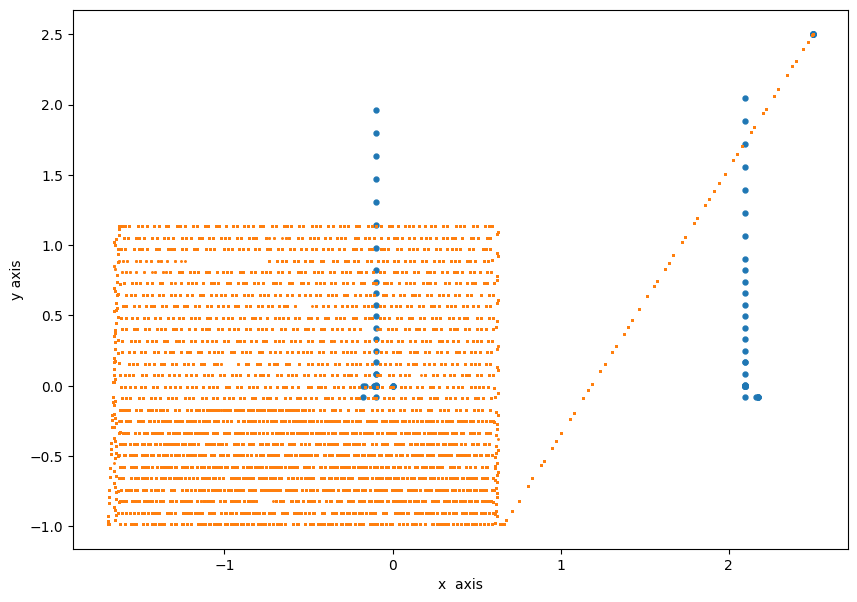

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(cube_gcode_values['x'].loc[:100], cube_gcode_values['y'].loc[:100], marker='.', s=50)
plt.scatter(copy2['x'].loc[:20000], copy2['y'].loc[:20000], marker='.', s=5)
plt.xlabel('x  axis')
plt.ylabel('y axis')
# plt.ylim(-2.8, -2.3)
plt.show()

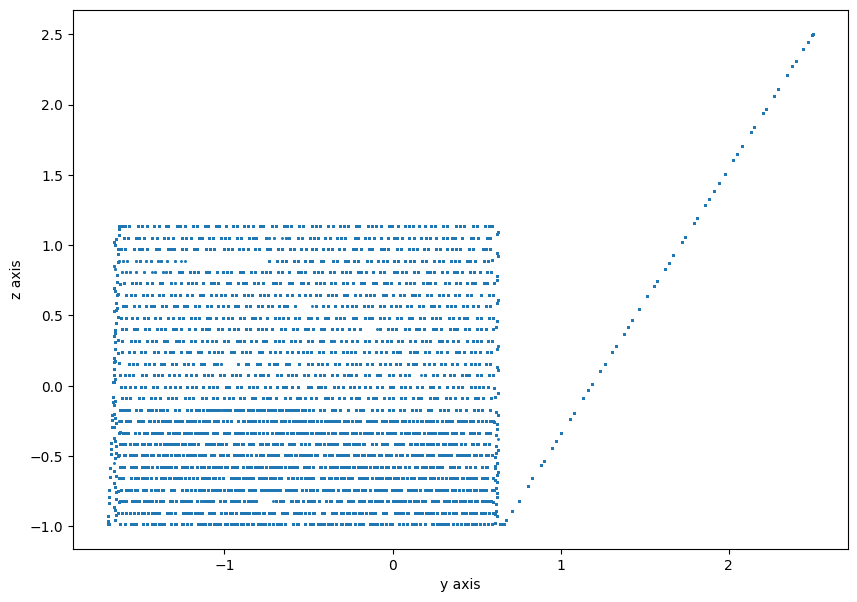

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(copy2['x'].loc[:20000], copy2['y'].loc[:20000], marker='.', s=5)
plt.xlabel('y axis')
plt.ylabel('z axis')
# plt.ylim(-2.8, -2.3)
plt.show()

<Axes: >

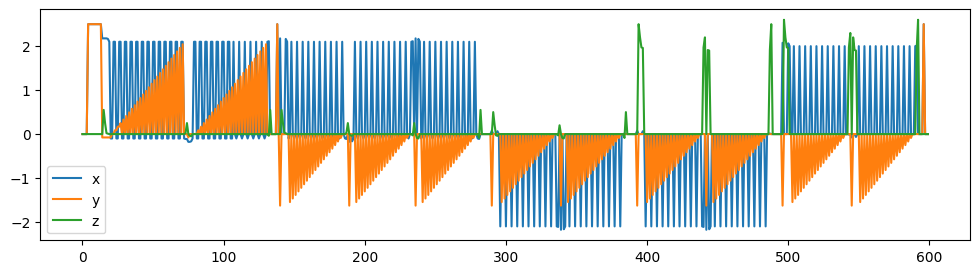

In [840]:
cube_gcode_values.drop(columns=['a', 'b']).plot(figsize=(12, 3))

<Axes: >

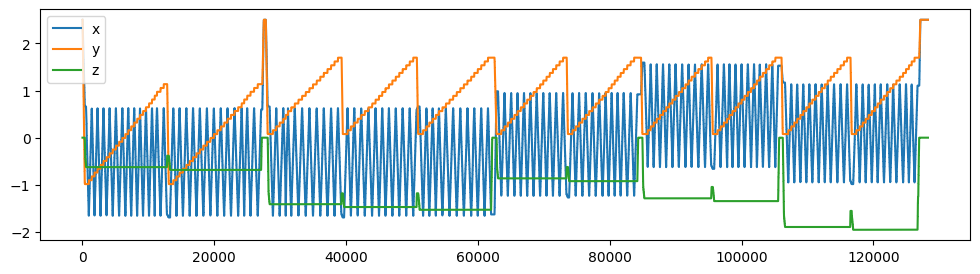

In [841]:
copy2.drop(columns=['a', 'b']).plot(figsize=(12, 3))


In [ ]:
spiral_gcode_a = spiral_gcode_orig.copy()
spiral_gcode_b = spiral_gcode_orig.copy()
spiral_gcode_x = spiral_gcode_orig.copy()
spiral_gcode_y = spiral_gcode_orig.copy()
spiral_gcode_z = spiral_gcode_orig.copy()

spiralmaska = ~spiral_gcode_a.astype(str).apply(lambda col: col.str.contains('A', na=False))
# Replace values in the DataFrame where the mask is True with 0
spiral_gcode_a[spiralmaska] = 0

spiralmaskb = ~spiral_gcode_b.astype(str).apply(lambda col1: col1.str.contains('B', na=False))
spiral_gcode_b[spiralmaskb] = 0

spiralmaskx = ~spiral_gcode_x.astype(str).apply(lambda col2: col2.str.contains('X', na=False))
spiral_gcode_x[spiralmaskx] = 0

spiralmasky = ~spiral_gcode_y.astype(str).apply(lambda col3: col3.str.contains('Y', na=False))
spiral_gcode_y[spiralmasky] = 0

spiralmaskz = ~spiral_gcode_z.astype(str).apply(lambda col4: col4.str.contains('Z', na=False))
spiral_gcode_z[spiralmaskz] = 0


aspiralmelted_df = spiral_gcode_a.reset_index().melt(id_vars='index', var_name='original_column', value_name='value')
non_zero_values = aspiralmelted_df[aspiralmelted_df['value'] != 0]
combined_column = non_zero_values.groupby('index')['value'].apply(list)
result_series = combined_column.reindex(spiral_gcode_a.index, fill_value=0)
a_spiral_df = pd.DataFrame(result_series)
a_spiral_df.columns = ['b']

bspiralmelted_df = spiral_gcode_b.reset_index().melt(id_vars='index', var_name='original_column', value_name='value')
non_zero_values = bspiralmelted_df[bspiralmelted_df['value'] != 0]
combined_column = non_zero_values.groupby('index')['value'].apply(list)
result_series = combined_column.reindex(spiral_gcode_b.index, fill_value=0)
b_spiral_df = pd.DataFrame(result_series)
b_spiral_df.columns = ['b']

xspiralmelted_df = spiral_gcode_x.reset_index().melt(id_vars='index', var_name='original_column', value_name='value')
non_zero_values = xspiralmelted_df[xspiralmelted_df['value'] != 0]
combined_column = non_zero_values.groupby('index')['value'].apply(list)
result_series = combined_column.reindex(spiral_gcode_x.index, fill_value=0)
x_spiral_df = pd.DataFrame(result_series)
x_spiral_df.columns = ['x']

yspiralmelted_df = spiral_gcode_y.reset_index().melt(id_vars='index', var_name='original_column', value_name='value')
non_zero_values = yspiralmelted_df[yspiralmelted_df['value'] != 0]
combined_column = non_zero_values.groupby('index')['value'].apply(list)
result_series = combined_column.reindex(spiral_gcode_y.index, fill_value=0)
y_spiral_df = pd.DataFrame(result_series)
y_spiral_df.columns = ['y']

zspiralmelted_df = spiral_gcode_z.reset_index().melt(id_vars='index', var_name='original_column', value_name='value')
non_zero_values = zspiralmelted_df[zspiralmelted_df['value'] != 0]
combined_column = non_zero_values.groupby('index')['value'].apply(list)
result_series = combined_column.reindex(spiral_gcode_z.index, fill_value=0)
z_spiral_df = pd.DataFrame(result_series)
z_spiral_df.columns = ['z']

spiral_df = pd.concat([a_spiral_df, b_spiral_df, x_spiral_df, y_spiral_df, z_spiral_df], axis=1)
# spiral_df.to_csv('spiral_gcode_movement_num.csv', index=False)

NameError: name 'spiral_gcode_orig' is not defined

In [ ]:
gcode_movement_values = pd.read_csv("gcode_movement_num.csv", delimiter=',')